'sys' module to access system parameters
'pandas' module to work with data in tabular form
'matplotlib' module to create visualizations
'numpy' module to work with arrays
'scipy' module for scientific computing
'sklearn' module for machine learning
'IPython' module for enhanced interactive console
'random' module to generate random numbers.

In [1]:
import time
start_time = time.time()

#load packages
import sys #access to system parameters 
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import sklearn as sk 
print("SciPy version: {}". format(sk.__version__)) 

import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

import random

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import pandas as pd
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.8.13 (default, Oct 19 2022, 22:38:03) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.1
matplotlib version: 3.6.2
NumPy version: 1.23.3
SciPy version: 1.9.3
SciPy version: 1.1.3
IPython version: 8.10.0
scikit-learn version: 1.1.3
-------------------------


In [2]:
data = pd.read_excel(r"C:\Users\drang\Downloads\daily_offers.xlsx", na_values=np.NaN, dtype={"selling_price": float})

1 Data Understanding and Exploration:
The first step in any data science project is to understand the data and explore it
2 Data Preprocessing:
After understanding and exploring the data, the next step is to preprocess it. This involves dealing with missing values, outliers, Scaling numerical variables and any other anomalies that may affect the analysis.
3 Feature Selection and Engineering:
After preprocessing the data, the next step is to select and engineer the features that are most relevant to the target variable. This involves selecting the most important features using feature selection techniques and creating new features using feature engineering techniques. 
4 Model Selection and Evaluation:
After selecting and engineering the features, the next step is to select the best model for the data and evaluate its performance. This involves training and testing various regression models such as Linear Regression, Random Forest Regression

Some of the evaluation metrics that we can use to evaluate the performance of the models are:

Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-Squared (R2)

5 Deployment:
After selecting the best model and evaluating its performance, the final step is to deploy the model and make predictions on new data. This involves integrating the model into a web application or a mobile app and using it to make predictions on new data.

In [3]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
data.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

# PREPROCESSING

## The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

This code prints out the number of null values in each column of the DataFrame data.

In [3]:

print('Data columns with null values:\n', data.isnull().sum())


Data columns with null values:
 id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [5]:
df = data.copy()
df#.describe()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [15]:
df.nunique()


id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

This code converts the specified categorical columns of the DataFrame  to numerical codes using the cat.codes method in pandas.
It's worth noting that this method of encoding categorical variables is a common technique in machine learning, but it may not always be appropriate depending on the specific dataset and the desired outcome. In some cases, other encoding methods such as one-hot encoding or target encoding may be more appropriate. 
it's important to ensure that the original data is backed up before performing these operations in case any mistakes are made.

In [69]:
# CONVERTING CATEGORIES INTO NUMERICS--can also use label encoder
cols2 = [ 'item type', 'material_ref', 'product_ref', 'status']
for i in cols2:
    df[i]=df[i].astype('category').cat.codes

The eq method in pandas is used to check element-wise whether each element in df is equal to 'e'

In [17]:
df.eq('e').any() # finding using eq --when we try to convert quantity tons dtypes it throw there s str 'e'

id               False
item_date        False
quantity tons     True
customer         False
country          False
status           False
item type        False
application      False
thickness        False
width            False
material_ref     False
product_ref      False
delivery date    False
selling_price    False
dtype: bool

In [25]:
#TREATING MIXED DTYPE COLUMN 'quantity tons' with median after converting str to 0
#to find the index used: df[df[i].loc[df[i].apply(lambda x:isinstance(x, float) or isinstance(x, int))]==False]
df['quantity tons'].iloc[173086] = 0
df['quantity tons'].iloc[173086] = df['quantity tons'].median()

This code snippet is converting the data type of the 'quantity tons' column from an object type to a float type using the .astype() method.

In [26]:
df['quantity tons']=df['quantity tons'].astype(float)
df.dtypes

id                object
item_date        float64
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

First, it creates a boolean series a that checks if each value in the 'material_ref' column starts with the string "000000". The .str.startswith() method is used to check this condition.

Then, it creates another boolean series b which contains only True values where the corresponding value in a is also True.

Next, it assigns np.NaN (i.e., a missing value) to the 'material_ref' column wherever b is True. This is done using the .loc method of the DataFrame.

In [32]:
#treating rubbish value in material_ref with nan
#TypeError: bad operand type for unary ~: 'float'" .The ~ operator is used to invert a boolean array or mask, but it only works with boolean values
a=df['material_ref'].str.startswith("000000")
print(a)
b=(a==True)
df['material_ref'][b] = np.NaN
#print(b,df[~b])
df


0         False
1           NaN
2         False
3         False
4         False
          ...  
181668      NaN
181669      NaN
181670      NaN
181671      NaN
181672      NaN
Name: material_ref, Length: 181673, dtype: object


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


It checks if all the values in the column are numerical by using the loc function to select only the rows where the value in the column is either a float or an int, and then using the all() function to check if all values in the selected rows are True.

In [33]:
#checking all data points dtypes or any str in float dtype column

print(df.dtypes)
cols1=['customer', 'country', 'application', 'thickness', 'width', 'product_ref','selling_price', 'quantity tons']
df.columns
for i in cols1:
    print("feature:", i, df[i].loc[df[i].apply(lambda x:isinstance(x, float) or isinstance(x, int))].all())
    print(df[i].dtypes)

id                object
item_date        float64
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object
feature: customer True
float64
feature: country True
float64
feature: application True
float64
feature: thickness True
float64
feature: width True
float64
feature: product_ref True
int64
feature: selling_price False
float64
feature: quantity tons True
float64


# FEATURE ENGINEERING

This is useful information because it can help us understand how quickly items are being delivered to customers.

In [34]:
#ANALYTICALLY DELIVERY TIME COULD IMPACT TRAINING REGRESSION

df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['delivery_time'] = (df['delivery date'] - df['item_date']).dt.total_seconds() # CALCULATING DIFFERENCES IN SECONDS

 If the aspect_ratio is greater than 1, it means that the item is wider than it is thick, and if it is less than 1, it means that it is thicker than it is wide.
 
 This gives us the total amount of money earned by selling each steel item.

In [35]:
#ASPECT RATIO OF COPPER AND TOTAL AMOUNT IN CURRENCY

df['aspect_ratio'] = df['width'] / df['thickness']
df['total_amount'] = df['quantity tons'] * df['selling_price']

In [36]:
#DROPPING IRRELEVANT FEATURES

df.drop(['id', 'item_date', 'delivery date'], axis=1, inplace=True)

In [37]:
cols0= [df.columns[df.isnull().sum()>0]]
cols0[0]

Index(['customer', 'country', 'status', 'application', 'thickness',
       'material_ref', 'selling_price', 'delivery_time', 'aspect_ratio',
       'total_amount'],
      dtype='object')

In [38]:
df.isnull().sum()

quantity tons         0
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
selling_price         1
delivery_time         2
aspect_ratio          1
total_amount          1
dtype: int64

Mean is generally used for continuous numerical data that is normally distributed,
while median is used when the data is not normally distributed or contains outliers.
Mode is used for categorical data.

here missing values in the 'thickness' column are filled with the median because it is a continuous numerical data column that is not normally distributed. 

In [39]:
#FILLING NULL VALUES WITH MEAN, MEDIAN AND MODE ACCORDINGLY OF CONTINUOUS, CATEGORICAL AND SKEWED VARIABLES

for i in cols0[0]:
    print(i)
    if i == 'thickness':
        df[i].fillna(df[i].median(), inplace = True)    
    elif i in cols2:  #categorical values
        df[i].fillna(df[i].mode()[0], inplace = True)    
    else:    
        df[i].fillna(df[i].mean(), inplace = True)
        print(df[i].isnull().sum())

customer
0
country
0
status
application
0
thickness
material_ref
selling_price
0
delivery_time
0
aspect_ratio
0
total_amount
0


highly correlated features can cause multicollinearity issues, which can affect the performance of the model. Multicollinearity occurs when two or more independent variables are highly correlated, which makes it difficult for the model to determine the individual effect of each variable on the target variable.

<AxesSubplot: >

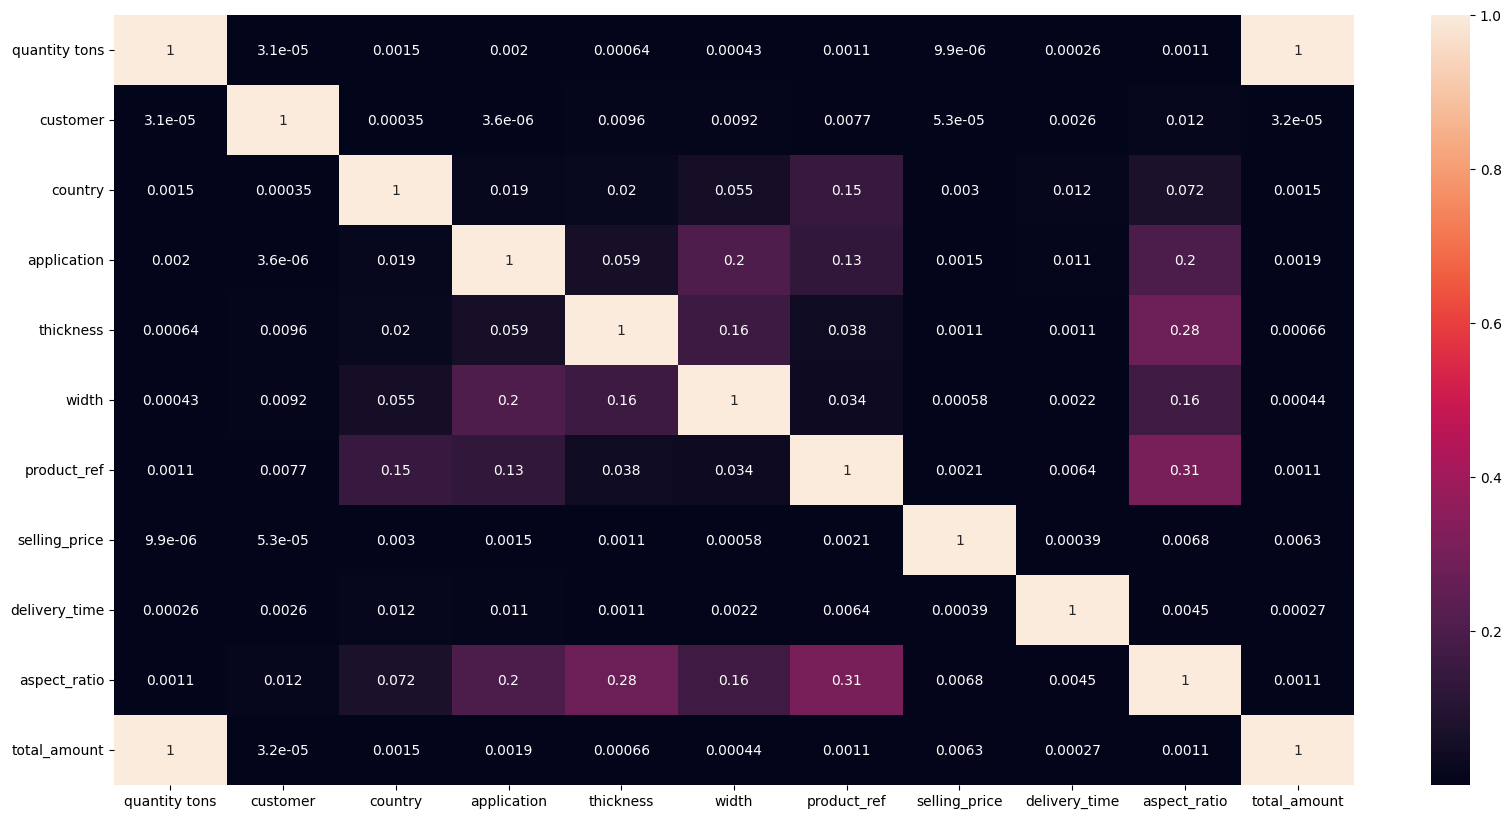

In [40]:
#HEATMAP FOR CORRELATION BETWEEN VARIABLES

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [41]:
df.describe()
df

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,delivery_time,aspect_ratio,total_amount
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,3.000000e-07,750.000000,4.624507e+04
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,1047.00,0.000000e+00,1512.500000,8.041220e+05
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33,-3.000000e-07,2505.263158,2.487938e+05
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,-3.000000e-07,572.608696,1.554517e+05
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,-1.000000e-07,500.000000,4.532487e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,591.00,-1.000000e-09,1270.833333,6.056711e+04
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,589.00,-1.000000e-09,1578.947368,1.225629e+05
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,619.00,-1.000000e-09,1760.563380,2.621832e+03
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,601.00,-1.000000e-09,1470.588235,-1.202000e+06


In statistical analysis, the term skewness refers to the degree of asymmetry of a probability distribution. If a probability distribution is symmetrical, it has a skewness of zero. But if a distribution is skewed to the left, meaning it has a long tail on the left side and a short tail on the right side, it has a negative skewness.

When a variable has a skewed distribution, it can lead to bias in statistical analysis and machine learning models. To deal with skewness, we can transform the variable to make its distribution more normal, or we can use techniques that are robust to non-normality, such as quantile-based discretization.
By discretizing these variables into bins, we can reduce the impact of skewness on statistical analysis and machine learning models. Additionally, it can help in identifying potential outliers and identifying relationships between variables.

what is QCUT:
The qcut function is useful for converting continuous variables into categorical variables by creating bins based on the distribution of the data, rather than using fixed-width bins. The resulting bins have approximately the same number of observations in each bin. useful when  the relationship between the variables is nonlinear.

In [42]:
#USING QCUTS FOR SKEW/IRREGULARLY DISTRIBUTED VARIABLES

df['thickness_bins'] = pd.qcut(df['thickness'], 10)
df['width_bins'] =  pd.qcut(df['width'], 10, duplicates='drop')
df['quantity_bins'] = pd.qcut(df['quantity tons'], 15)

LabelEncoder is a class from the scikit-learn library that is used to encode categorical integer features as numeric.
For example, suppose the thickness_bins column is created using qcut() and contains 10 bins. Each bin will have a unique range of values, and LabelEncoder will encode each bin with a unique integer code ranging from 0 to 9. 

In [43]:
# CONVERT BINS(RANGE) INTO BIN CODE(SINGLEDIGIT)
label = LabelEncoder()
df['thicknessbincode'] = label.fit_transform(df['thickness_bins'])
df['widthbincode'] = label.fit_transform(df['width_bins'])
df['quantitybincode'] = label.fit_transform(df['quantity_bins'])


In [51]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time,aspect_ratio,total_amount,thicknessbincode,widthbincode,quantitybincode
count,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,1.816730e+05,1.816730e+05,181673.000000,1.816730e+05,181673.000000,181673.000000,181673.000000
mean,5.874894e+03,3.051221e+07,44.893022,25.615809,2.564822,1295.286724,4.739679e+08,1.918036e+03,2.793297e-06,1103.709668,3.556649e+06,4.262411,3.541721,7.000000
std,2.349075e+06,2.433375e+07,24.402334,17.753002,6.572303,261.631754,7.175101e+08,3.317947e+05,2.403362e-05,846.873134,1.371782e+09,2.791811,2.244113,4.320518
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03,-1.981700e-05,0.416667,-1.202000e+06,0.000000,0.000000,0.000000
25%,1.097037e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02,1.700000e-07,416.250000,9.017907e+03,2.000000,2.000000,3.000000
50%,3.036428e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02,2.900000e-07,805.000000,2.438530e+04,4.000000,3.000000,7.000000
75%,6.716038e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02,8.899000e-06,1714.285714,5.629627e+04,6.000000,6.000000,11.000000
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08,1.009970e-02,5555.000000,5.830000e+11,9.000000,7.000000,14.000000


In [109]:
cols4=['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'material_ref', 'product_ref', 'delivery_time', 'aspect_ratio', 'total_amount', 'thicknessbincode',
       'widthbincode', 'quantitybincode'] #  training parameters
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'selling_price', 'delivery_time', 'aspect_ratio', 'total_amount',
       'thickness_bins', 'width_bins', 'quantity_bins', 'thicknessbincode',
       'widthbincode', 'quantitybincode'],
      dtype='object')

This code prints the count of each unique value in the 'customer' column of the DataFrame 'df'.

In [46]:
#the summary of more occurence points
print(df['customer'].value_counts())
print(df['country'].value_counts())
print(df['status'].value_counts())
print(df['item type'].value_counts())
print(df['application'].value_counts())
print(df['material_ref'].value_counts())
print(df['product_ref'].value_counts())

30157111.0    4988
30161088.0    3733
30201846.0    3152
30165529.0    2728
30202938.0    2570
              ... 
30356522.0       1
30227446.0       1
30229958.0       1
30356502.0       1
30160068.0       1
Name: customer, Length: 1170, dtype: int64
78.000000     32084
26.000000     27516
25.000000     23362
27.000000     21511
32.000000     18658
28.000000     15824
84.000000     12776
77.000000      9714
30.000000      8702
39.000000      3731
79.000000      2742
38.000000      1712
40.000000      1683
80.000000       819
113.000000      714
89.000000        92
44.893022        28
107.000000        5
Name: country, dtype: int64
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           

# EDA

The purpose of creating a histogram is to visualize the distribution of the data. It shows how frequently different values occur in the 'quantity tons' column, and gives an idea of the range of values and how they are spread out.

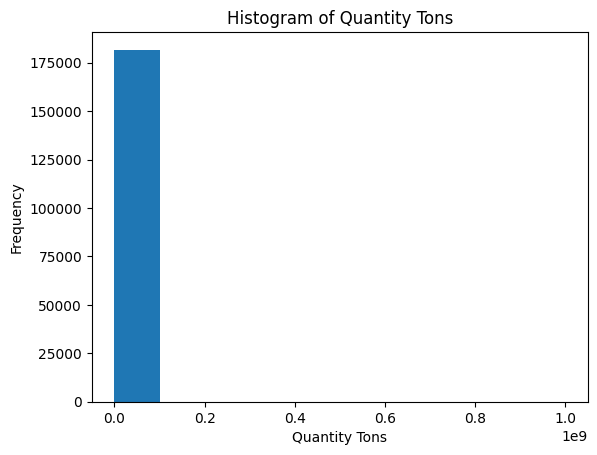

In [47]:
import matplotlib.pyplot as plt

plt.hist(df['quantity tons'], bins=10)
plt.title('Histogram of Quantity Tons')
plt.xlabel('Quantity Tons')
plt.ylabel('Frequency')
plt.show()

A boxplot is a type of graph that displays the distribution of a dataset based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.

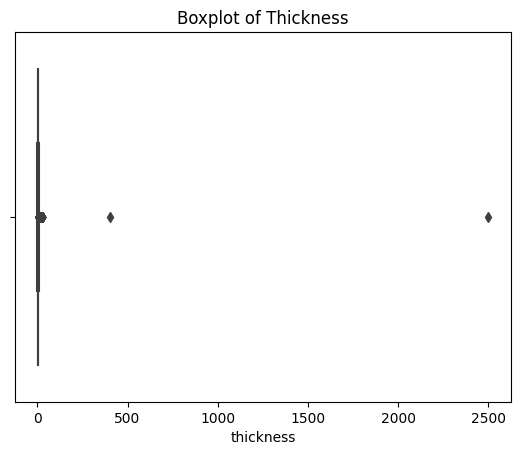

In [48]:
# these two charts show rightskewness of thickness and quantity tons
import seaborn as sns

sns.boxplot(x='thickness', data=df)
plt.title('Boxplot of Thickness')
plt.show()


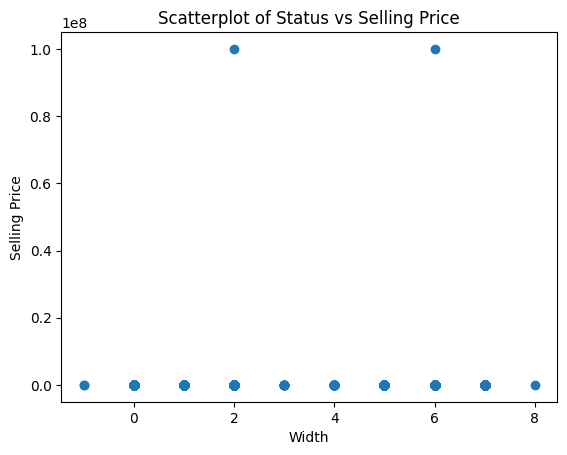

In [10]:
# IF ERROR, GET X_CLEAN, Y_CLEAN FROM OUTLIER FACTOR BELOW 
import matplotlib.pyplot as plt

plt.scatter(x=df['status'].astype('category').cat.codes, y=df['selling_price'])
plt.title('Scatterplot of Status vs Selling Price')
plt.xlabel('Width')
plt.ylabel('Selling Price')
plt.show()

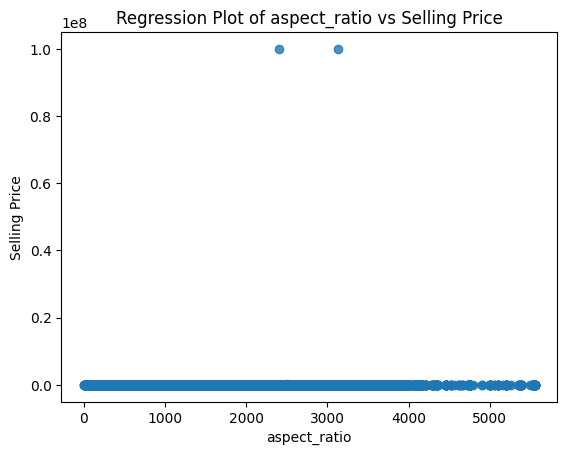

In [50]:
import seaborn as sns

sns.regplot(x='aspect_ratio', y='selling_price', data=df)
plt.title('Regression Plot of aspect_ratio vs Selling Price')
plt.xlabel('aspect_ratio')
plt.ylabel('Selling Price')
plt.show()

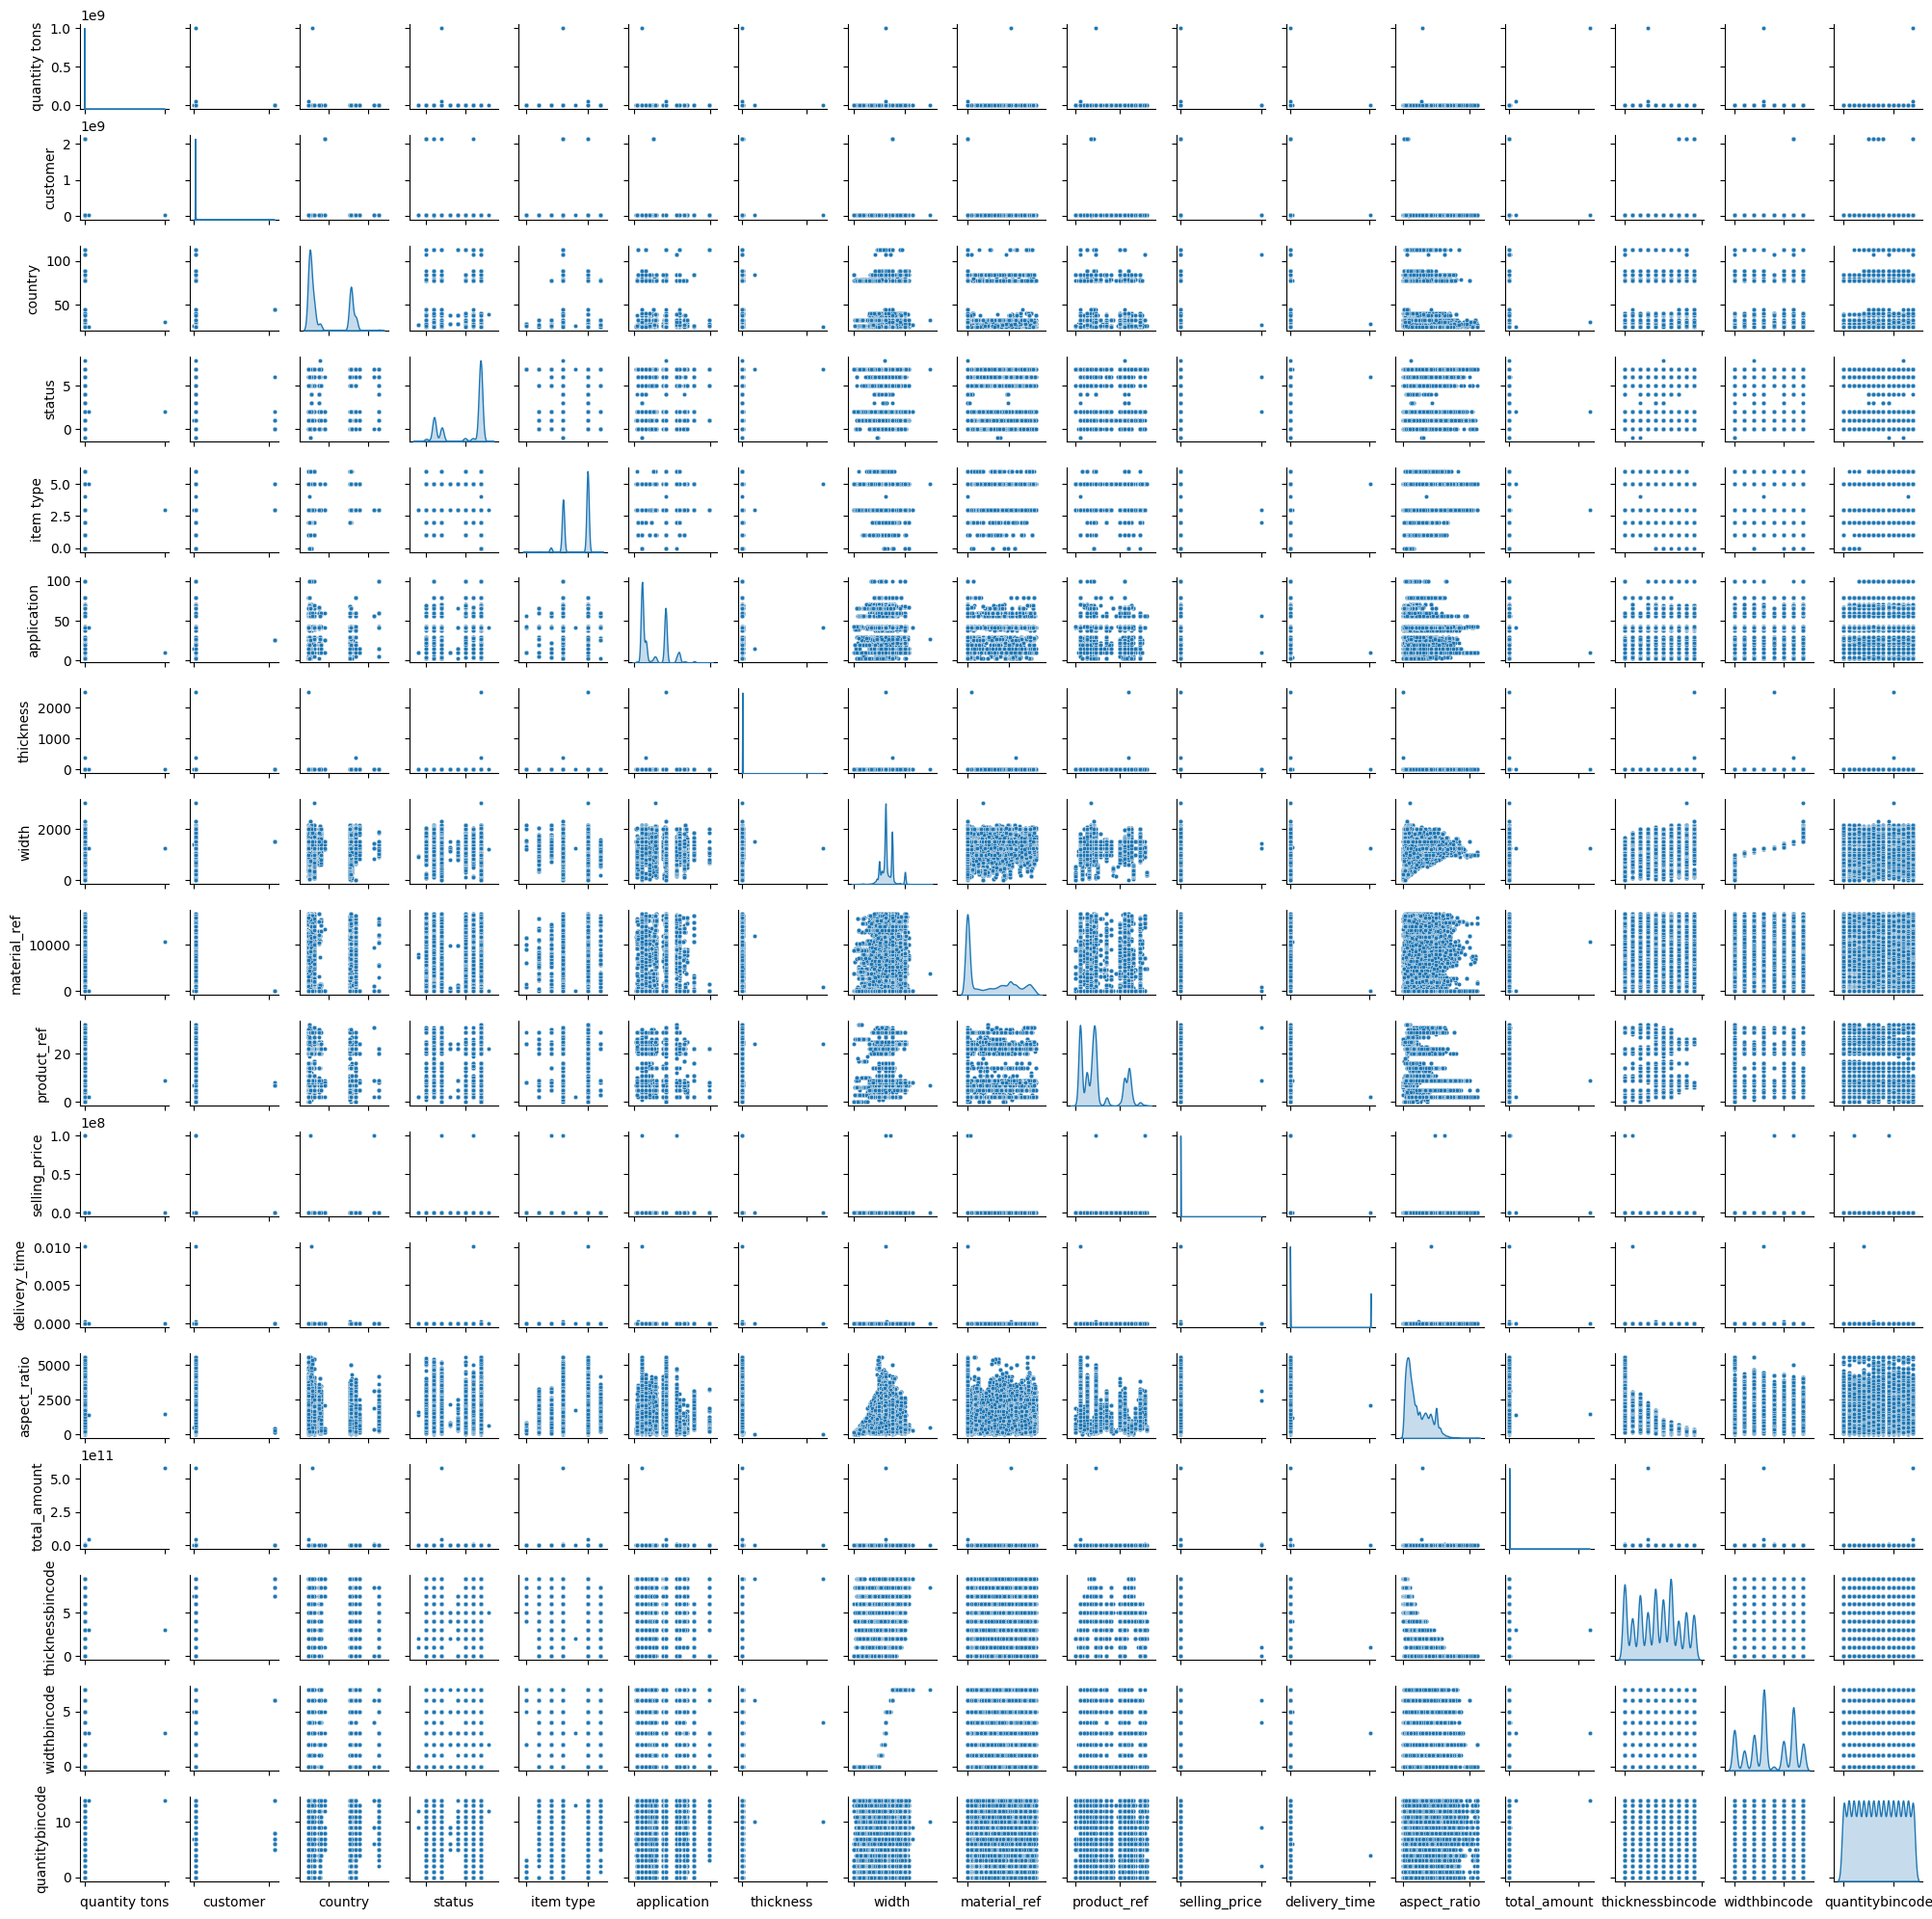

In [29]:
pp = sns.pairplot(df, palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

distplot is a function in the seaborn library that is used to visualize the distribution of a univariate set of observations. It basically plots a histogram and fits a kernel density estimate (KDE) to the data, providing a smooth estimate of the distribution.

KDE works by using a kernel function to approximate the probability density of a random variable. The kernel function is centered at each data point in the sample, and the kernel functions are summed together to form a smooth curve that approximates the density of the data.

f
​
  h
​
 (x)= 
1/n
∑
​
 K 
h
​
 (x−x 
i
​
 )

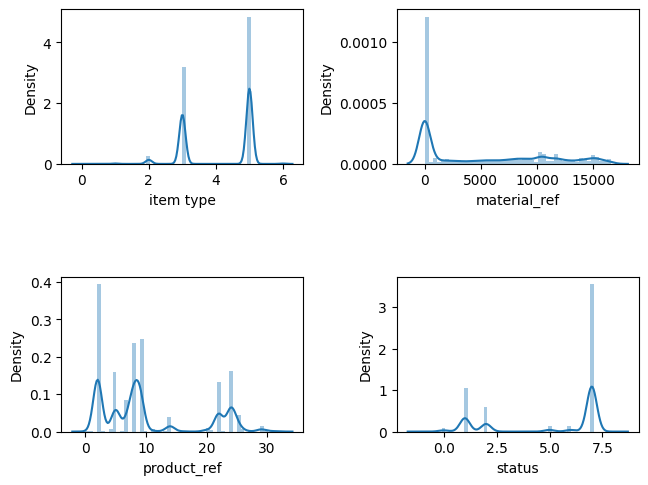

In [30]:
#Distribution plot
fig, axs = plt.subplots(nrows=2, ncols=2)
axes = axs.flatten()
index=0
for i, j in df[cols2].items():
    sns.distplot(j, ax= axes[index])
    index+=1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

NameError: name 'dfs' is not defined

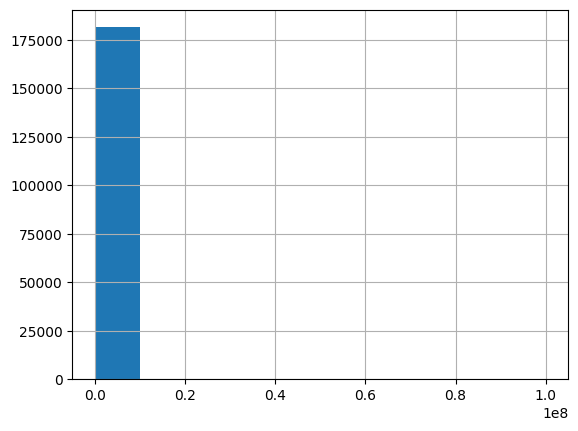

In [119]:
#histogram of selling prices
df['selling_price'].hist()
dfs['sell'] = pd.qcut(data1['selling_price'], 10)
# convert bin labels to their midpoint values
dfs['sell_mid'] = dfs['sell'].apply(lambda x: x.mid)
dfs['sell_mid'].hist()


# OUTLIER DETECTION


(142151, 1)


Text(0, 0.5, 'frequency')

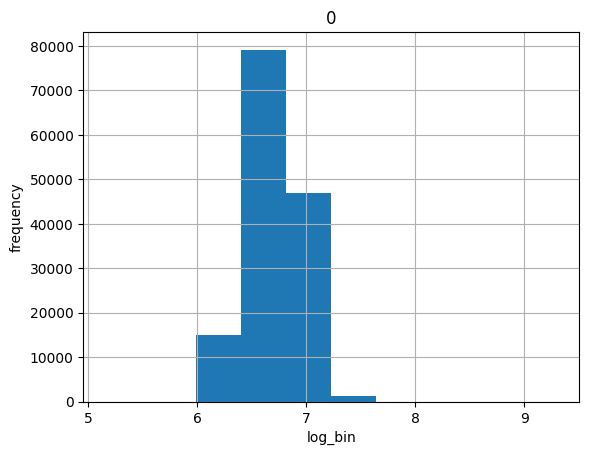

In [121]:
#checking log transformation of y
dfs1 = df['selling_price'].apply(np.log)
dfs1 = dfs1[np.isfinite(dfs1)]
dfs1= pd.DataFrame(y_clean)
# infinity values occurs as points far away from mean, so removing it

print(dfs1.shape)
dfs1.hist(bins=10)
plt.xlabel('log_bin')
plt.ylabel('frequency')

In [53]:
df.shape

(181673, 20)

In [54]:
data['selling_price'].describe()

count    1.816720e+05
mean     1.918036e+03
std      3.317956e+05
min     -1.160000e+03
25%      6.690000e+02
50%      8.120000e+02
75%      9.530000e+02
max      1.000010e+08
Name: selling_price, dtype: float64

In [55]:
data1=data

Isolation Forest is an unsupervised learning algorithm for anomaly detection, which means that it identifies observations that are significantly different from the rest of the data. The algorithm works by building an ensemble of isolation trees. An isolation tree is a binary tree that recursively splits the data into two parts until each part contains only one observation. The split is based on selecting a random feature and a random value within the range of that feature. The algorithm creates a tree by repeating this process until a specified depth is reached or the data is completely isolated.
This is because the anomaly is expected to be isolated more quickly and easily than normal data points. Thus, the average path length for a given data point across all decision trees in the forest is used as the anomaly score.



In [122]:


imputer = SimpleImputer(strategy='mean')  # instantiate an Imputer object with mean strategy

import numpy as np
y = df['selling_price']
X = df[cols4]

y= np.log(np.array(y))
print(y.shape)
y[y == -np.inf] = np.nan
y[y == np.inf] = np.nan
print(y.shape)

y = imputer.fit_transform(y.reshape(-1,1))  # replace NaNs with mean values of corresponding columns

#removing null values created by np.log transform
data = np.hstack((np.array(X), np.array(y).reshape(-1, 1)))

print(np.isnan(data).sum())


# Fit the Isolation Forest model to the data
clf = IsolationForest(random_state=0)
clf.fit(data)

# Predict the outlier status of each sample
outlier_labels = clf.predict(data)

# Remove the outlier samples from the data
X_clean = X[outlier_labels == 1]
y_clean = y[outlier_labels == 1]


#181K TO 138K DATA POINTS



(181673,)
(181673,)
0


In [123]:
X_clean


,quantity tons,customer,country,status,item type,application,material_ref,product_ref,delivery_time,aspect_ratio,total_amount,thicknessbincode,widthbincode,quantitybincode
0,54.151139,30156308.0,28.0,7,5,10.0,5377,24,3.000000e-07,750.000000,4.624507e+04,5,6,10
5,225.790676,30202938.0,25.0,7,5,41.0,-1,22,0.000000e+00,843.333333,2.219522e+05,4,4,13
7,113.387124,30342192.0,32.0,7,5,41.0,-1,2,-3.000000e-07,1794.117647,1.055634e+05,2,2,12
8,69.071853,30341428.0,38.0,7,3,10.0,-1,20,3.000000e-07,2125.000000,9.414494e+04,1,5,11
9,630.626917,30202938.0,25.0,7,5,41.0,-1,22,0.000000e+00,776.666667,6.199063e+05,4,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,7,5,41.0,-1,9,-1.000000e-09,1270.833333,6.056711e+04,3,2,12
181669,208.086469,30200854.0,25.0,7,5,41.0,-1,9,-1.000000e-09,1578.947368,1.225629e+05,3,6,13
181670,4.235594,30200854.0,25.0,7,5,41.0,-1,9,-1.000000e-09,1760.563380,2.621832e+03,2,3,1
181671,-2000.000000,30200854.0,25.0,7,5,41.0,-1,9,-1.000000e-09,1470.588235,-1.202000e+06,3,3,0


In [124]:
#as box_cox takes only positive
X_clean[X_clean['quantity tons']/abs(X_clean['quantity tons'])==-1]= X_clean.median()


Box-Cox transformation is a technique used to transform non-normal distributed data to a normal distribution
This transformation is based on a power function and transforms the data 
BEST USECASE:   highly skewed variables or variables with extreme values. [QCUTS FAILS]
main advantage of Box-Cox transformation is that it can improve the performance of linear regression models and other machine learning algorithms that assume a normal distribution of the input variables.

The transformation is parameterized by a lambda value that determines the type of transformation to be applied. When lambda is equal to 0, a log transformation is applied; when lambda is equal to 1, no transformation is applied; and when lambda is not equal to 0 or 1, a power transformation is applied.


In [125]:
from scipy.stats import boxcox

# Apply the Box-Cox transformation to the right-skewed X 

X_clean['quantity tons'], _ = boxcox(X_clean['quantity tons'])


Text(0, 0.5, 'thick Size (#)')

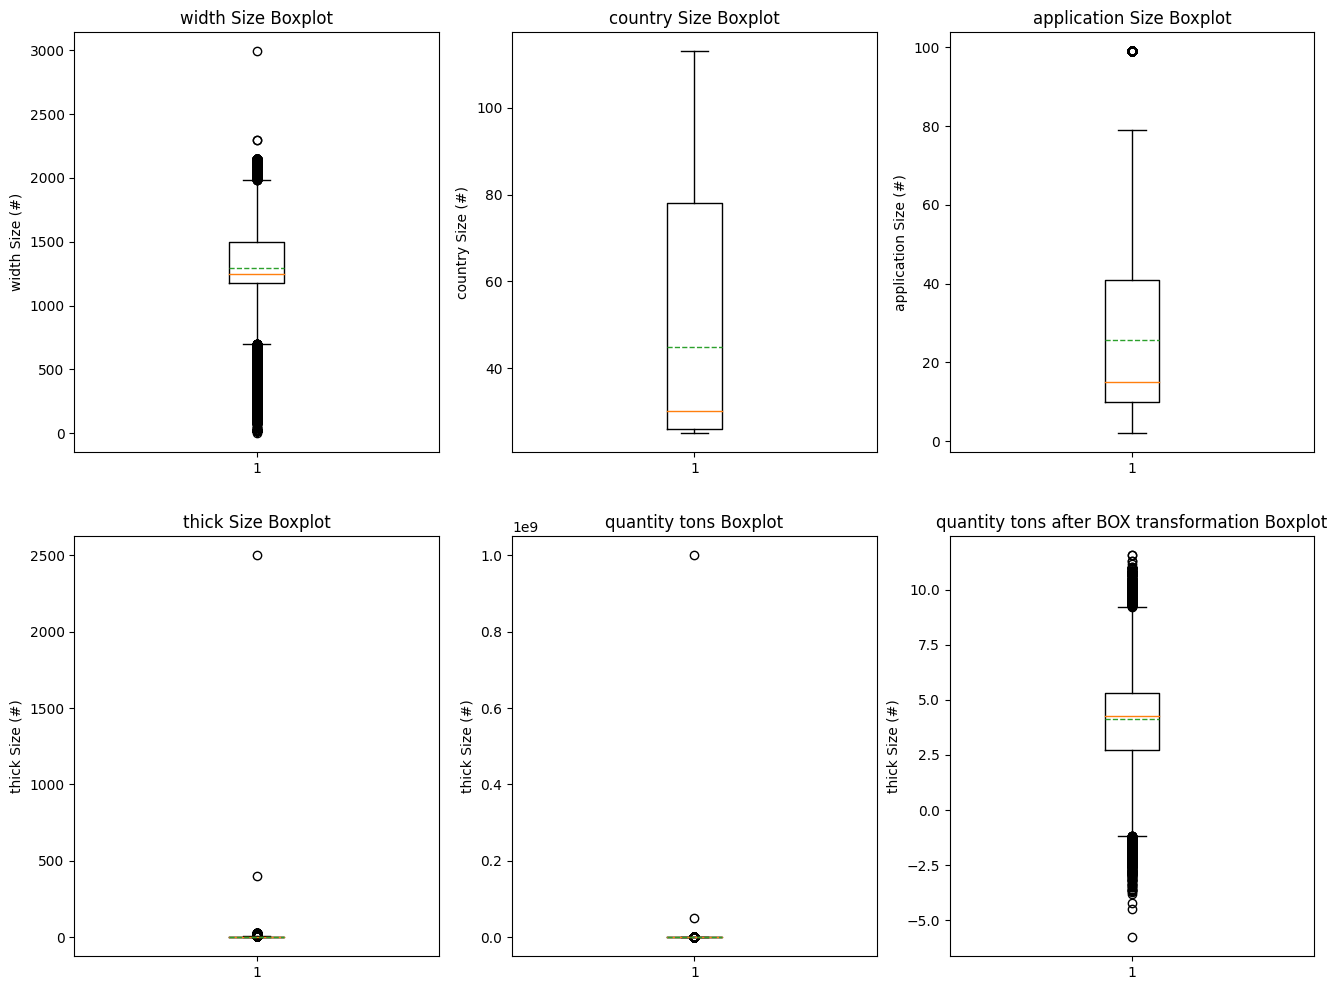

In [127]:
# box and whiskers plot for continuous variables
plt.figure(figsize=[16,12])

plt.subplot(231) 

plt.boxplot(df['width'], showmeans = True, meanline = True)
plt.title('width Size Boxplot')
plt.ylabel('width Size (#)')

plt.subplot(232) 
plt.boxplot(df['country'], showmeans = True, meanline = True)
plt.title('country Size Boxplot')
plt.ylabel('country Size (#)')

plt.subplot(233) 
plt.boxplot(df['application'], showmeans = True, meanline = True)
plt.title('application Size Boxplot')
plt.ylabel('application Size (#)')

plt.subplot(234) 
plt.boxplot(df['thickness'], showmeans = True, meanline = True)
plt.title('thick Size Boxplot')
plt.ylabel('thick Size (#)')

plt.subplot(235) 
plt.boxplot(df['quantity tons'], showmeans = True, meanline = True)
plt.title('quantity tons Boxplot')
plt.ylabel('thick Size (#)')

plt.subplot(236) 
plt.boxplot(X_clean['quantity tons'], showmeans = True, meanline = True)
plt.title('quantity tons after BOX transformation Boxplot')
plt.ylabel('thick Size (#)')

[(1.5, 2.0], (0.6, 0.8], (0.179, 0.5], (2.0, 3.0], (3.0, 4.0], (1.06, 1.5], (0.5, 0.6], (0.8, 1.06], (4.0, 6.0], (6.0, 2500.0]]
Categories (10, interval[float64, right]): [(0.179, 0.5] < (0.5, 0.6] < (0.6, 0.8] < (0.8, 1.06] ... (2.0, 3.0] < (3.0, 4.0] < (4.0, 6.0] < (6.0, 2500.0]]


<AxesSubplot: >

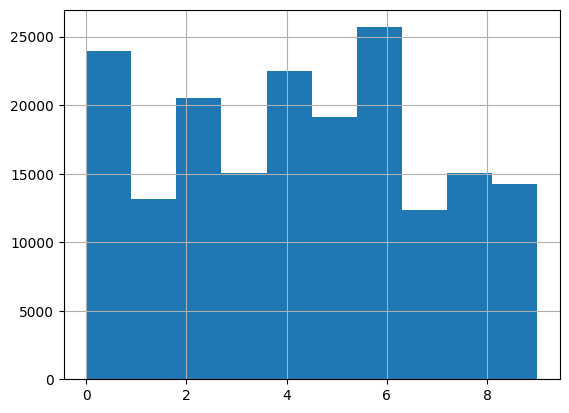

In [54]:
print(df['thickness_bins'].unique())
df['thicknessbincode'].hist()

<AxesSubplot: >

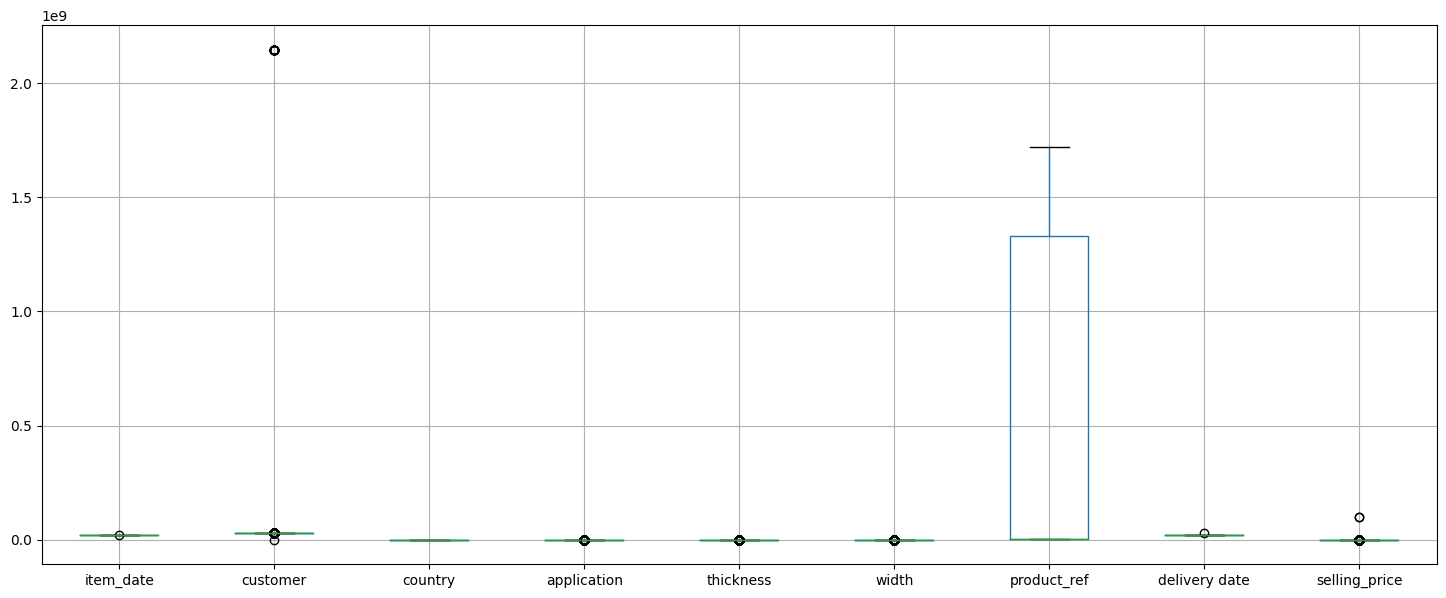

In [128]:
#before treating outliers
data1.boxplot(figsize=(18, 7))

In [116]:
y=df["selling_price"]
df["log_y"]= np.log(np.array(y))
cols5 = cols4 +["log_y"]+["selling_price"]
print(cols5)

['quantity tons', 'customer', 'country', 'status', 'item type', 'application', 'material_ref', 'product_ref', 'delivery_time', 'aspect_ratio', 'total_amount', 'thicknessbincode', 'widthbincode', 'quantitybincode', 'log_y', 'selling_price']


<AxesSubplot: >

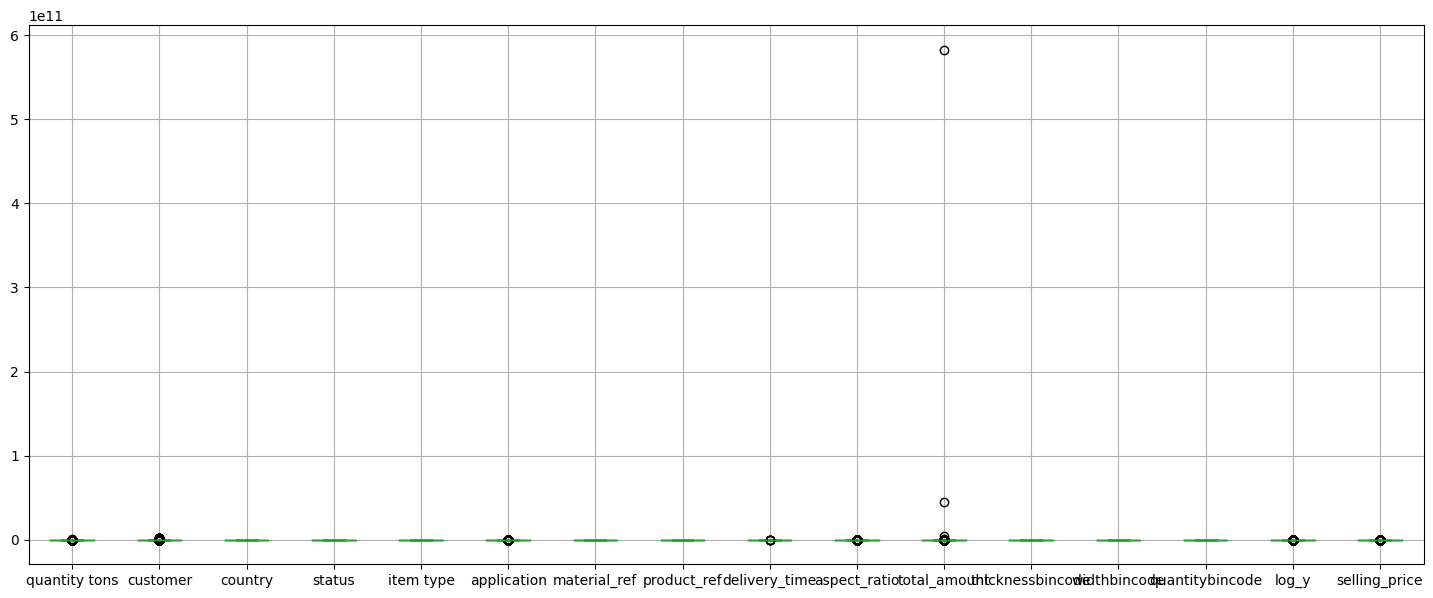

In [129]:
#after treating outlier
df[cols5].boxplot(figsize=(18, 7))



[Text(1, 0, 'quantity tons'),
 Text(2, 0, 'customer'),
 Text(3, 0, 'country'),
 Text(4, 0, 'status'),
 Text(5, 0, 'item type'),
 Text(6, 0, 'application'),
 Text(7, 0, 'material_ref'),
 Text(8, 0, 'product_ref'),
 Text(9, 0, 'delivery_time'),
 Text(10, 0, 'aspect_ratio'),
 Text(11, 0, 'total_amount'),
 Text(12, 0, 'thicknessbincode'),
 Text(13, 0, 'widthbincode'),
 Text(14, 0, 'quantitybincode'),
 Text(15, 0, 'log_y'),
 Text(16, 0, 'selling_price')]

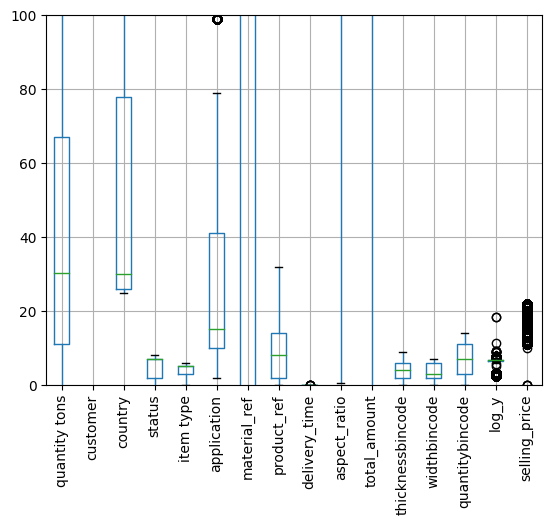

In [130]:
#after treating outlier
fig, ax = plt.subplots()
df[cols5].boxplot(figsize=(16, 9), ax=ax)

ax.set_ylim(bottom=0, top=100)
ax.set_xlim(auto=True)
ax.set_xticklabels(cols5, rotation=90)

In [113]:
#df[cols4]


['quantity tons', 'customer', 'country', 'status', 'item type', 'application', 'material_ref', 'product_ref', 'delivery_time', 'aspect_ratio', 'total_amount', 'thicknessbincode', 'widthbincode', 'quantitybincode', 'log_y']


sns.barplot creates a bar plot showing the relationship between a categorical variable (x-axis) and a numeric variable (y-axis). It computes an estimate of the central tendency (usually the mean) of the numeric variable and plots a bar to represent this estimate.

sns.pointplot is similar to sns.barplot, but instead of plotting bars, it plots points and connects them with lines. It is useful for showing how the mean value of a numeric variable changes across different categories of a categorical variable

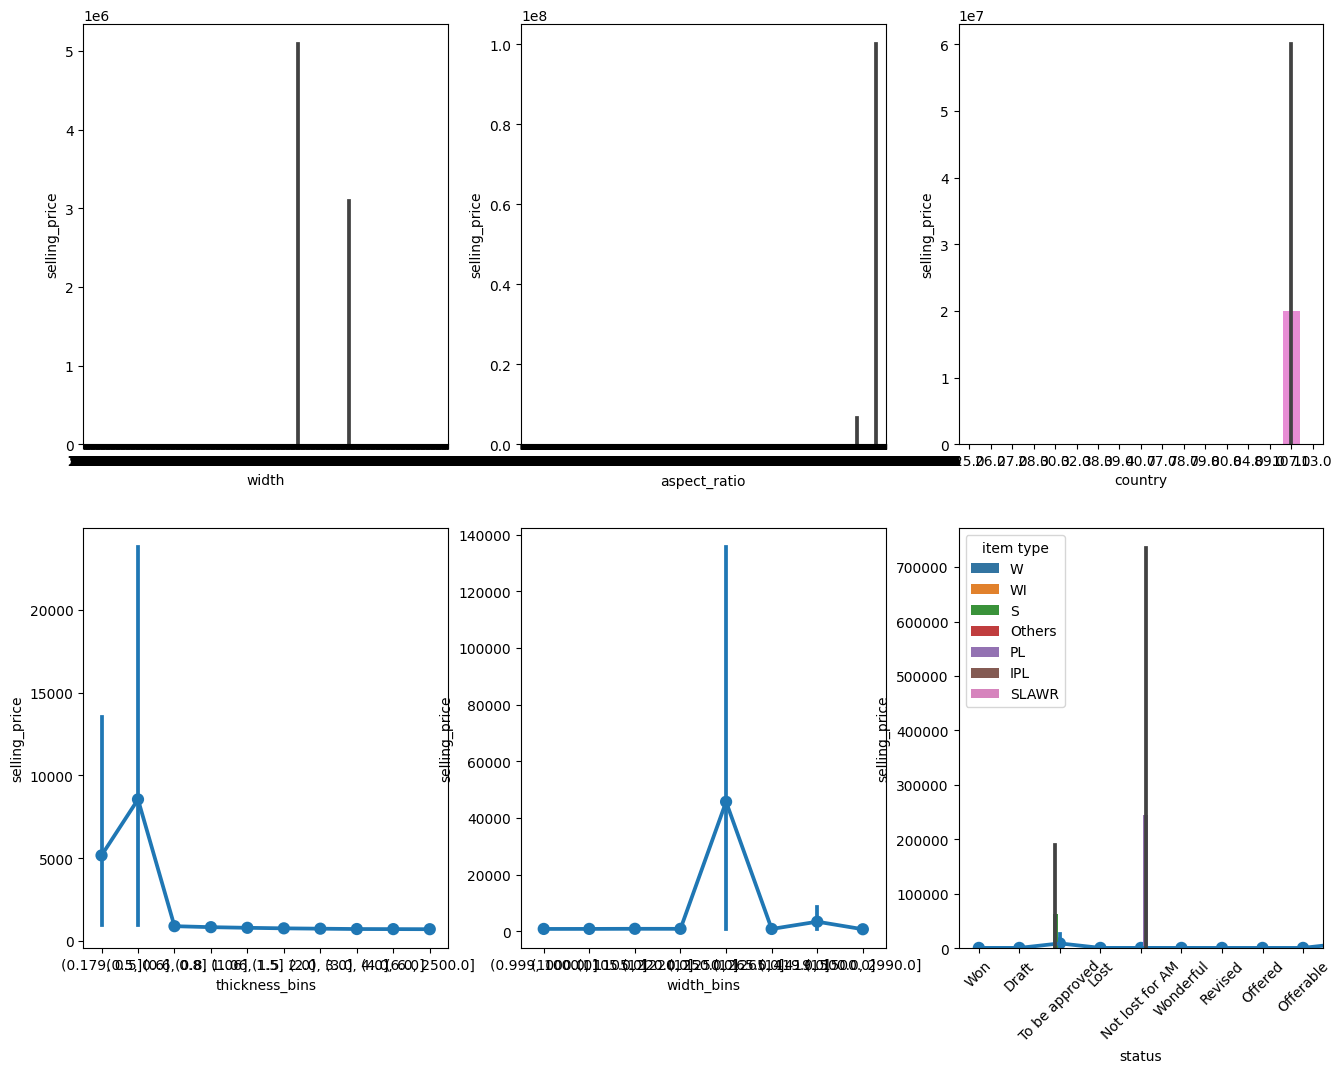

In [57]:
#we will use seaborn graphics for multi-variable comparison and bins range comparison

fig, saxis = plt.subplots(2, 3,figsize=(16,12))
sns.barplot(x = 'width', y = 'selling_price', data=data1, ax = saxis[0,0])
sns.barplot(x = 'aspect_ratio', y = 'selling_price', data=df, ax = saxis[0,1])
sns.barplot(x = 'country', y = 'selling_price',  data=data1, ax = saxis[0,2])

sns.pointplot(x = 'thickness_bins', y = 'selling_price',  data=df, ax = saxis[1,0])
sns.pointplot(x = 'width_bins', y = 'selling_price',  data=df, ax = saxis[1,1])
sns.pointplot(x = 'quantity_bins', y = 'selling_price', data=df, ax = saxis[1,2])
sns.barplot(x = 'status', y = 'selling_price', hue = 'item type', data=data1)
plt.xticks(rotation=90)
plt.show()

this plot can be useful for visualizing the relationship between two variables across different groups. By showing the relationship between 'width' and 'thickness' for each value of 'status' in separate subplots,

The pointplot function is used to plot the data points and the confidence intervals. 

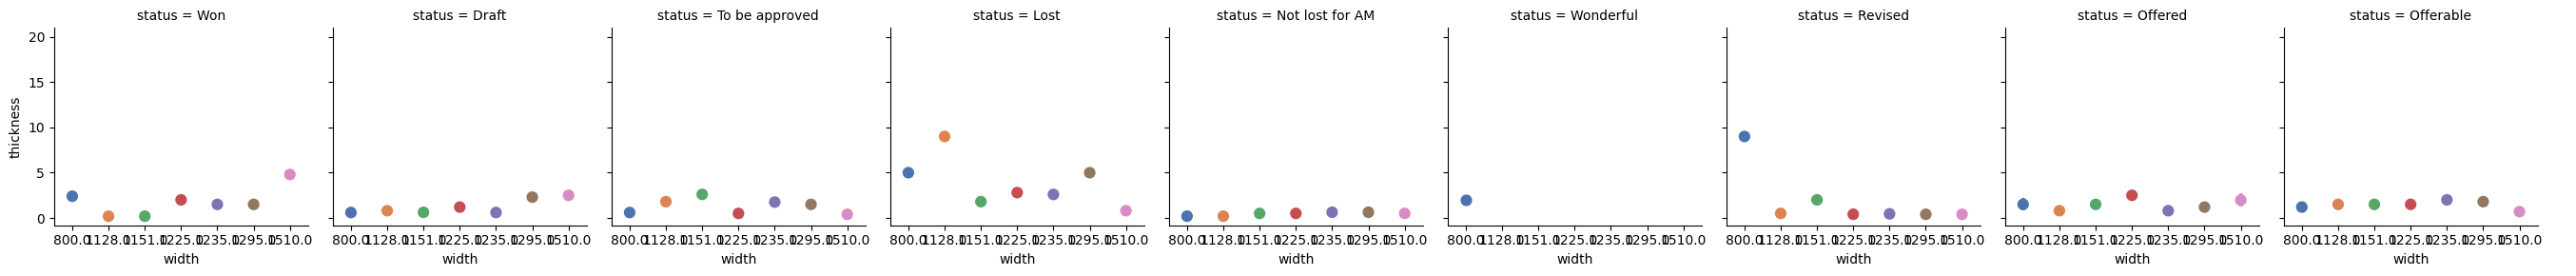

In [78]:
#facet grid with thickness x width separated by status (TAKES SOME TIME)
e = sns.FacetGrid(data1, col = 'status')
e.map(sns.pointplot, 'width', 'thickness', ci=95.0, palette = 'deep')
e.add_legend()
plt.xticks(rotation=45)
plt.show()

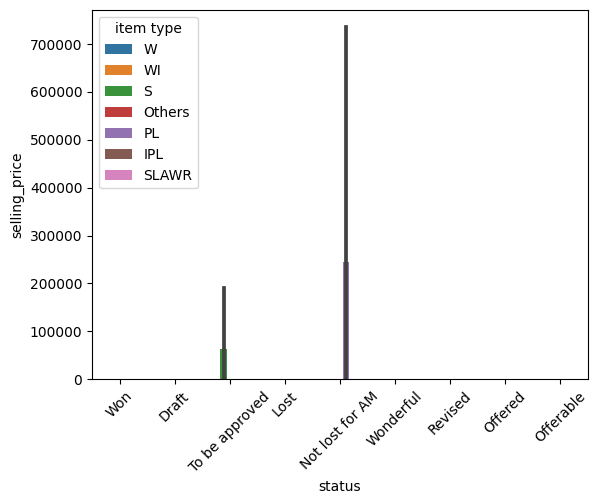

In [81]:
#bar plot for category vars against target var
sns.barplot(x = 'status', y = 'selling_price', hue = 'item type', data=data1)
plt.xticks(rotation=45)
plt.show()

The purpose of this code is to visualize the distribution of categorical variables in the dataset. By using a countplot, we can quickly see the number of occurrences of each category in a given variable. This can be helpful in understanding the balance of classes in the dataset

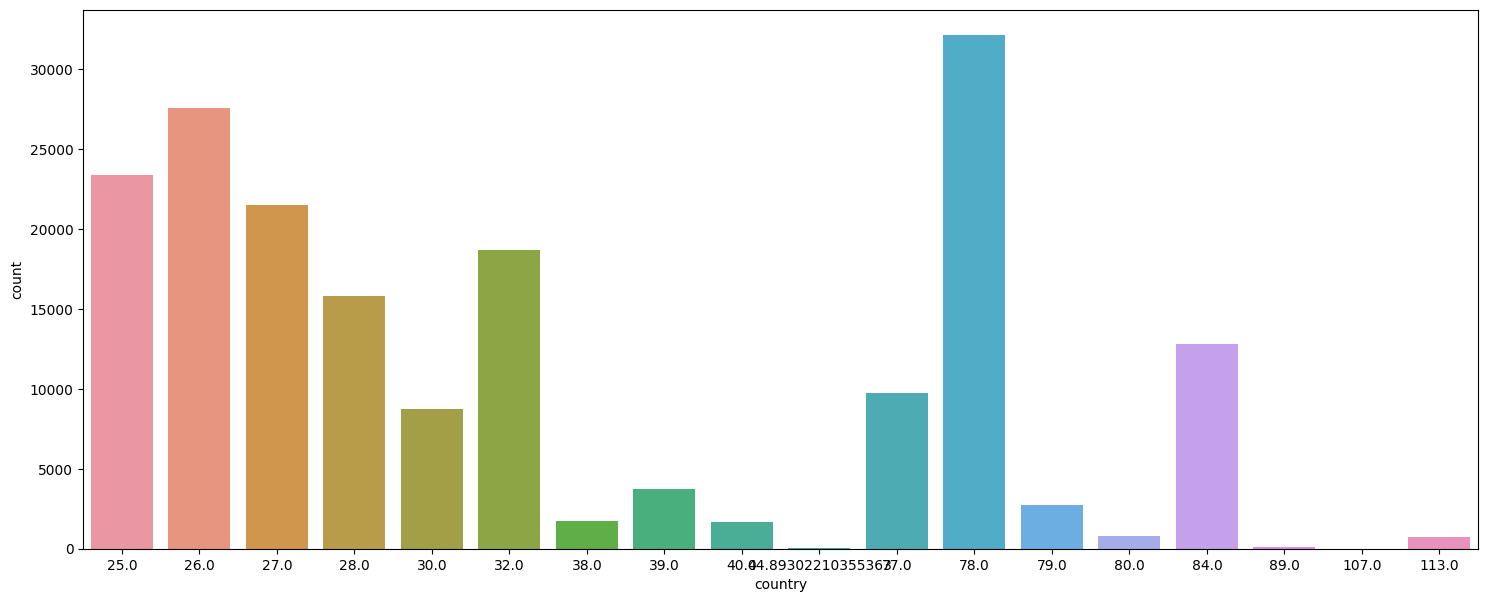

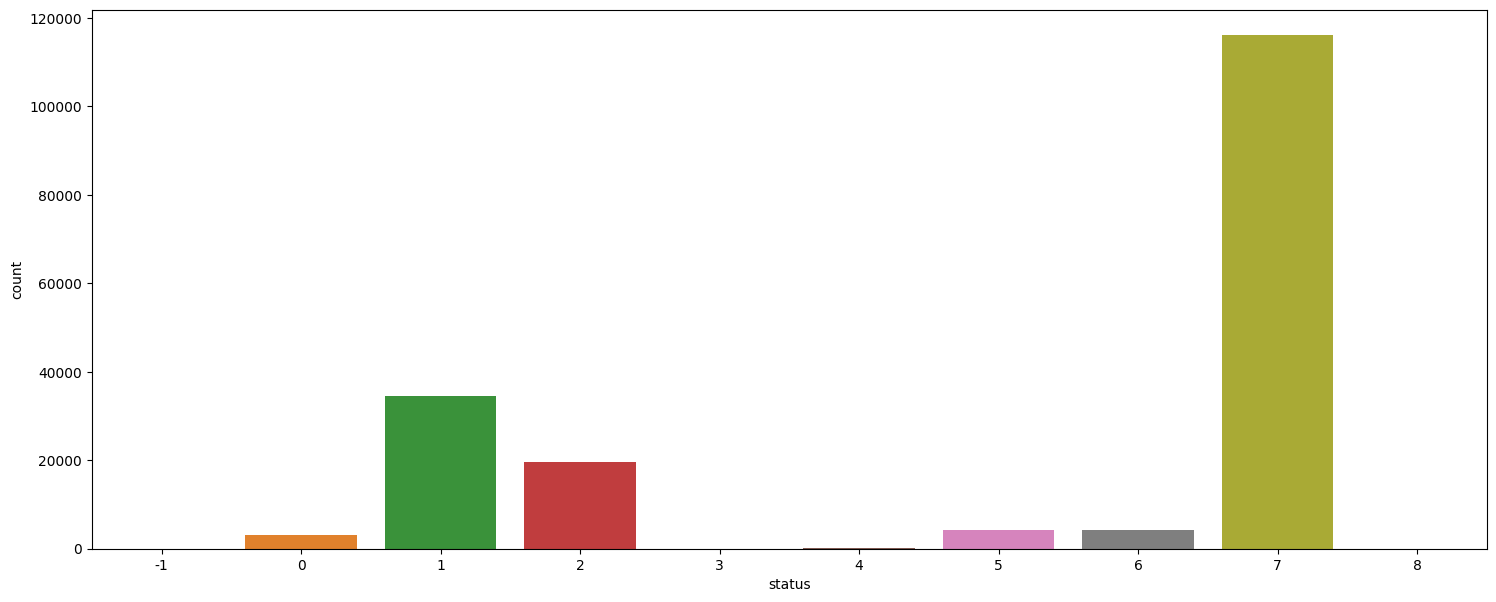

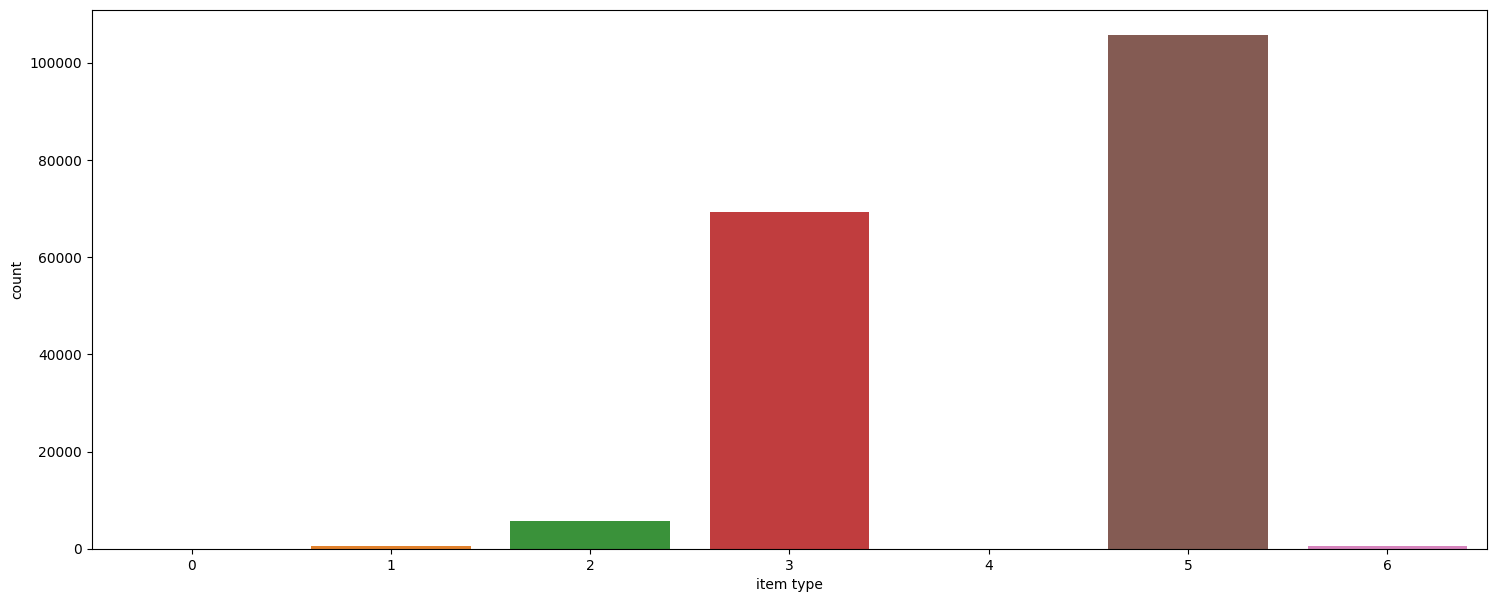

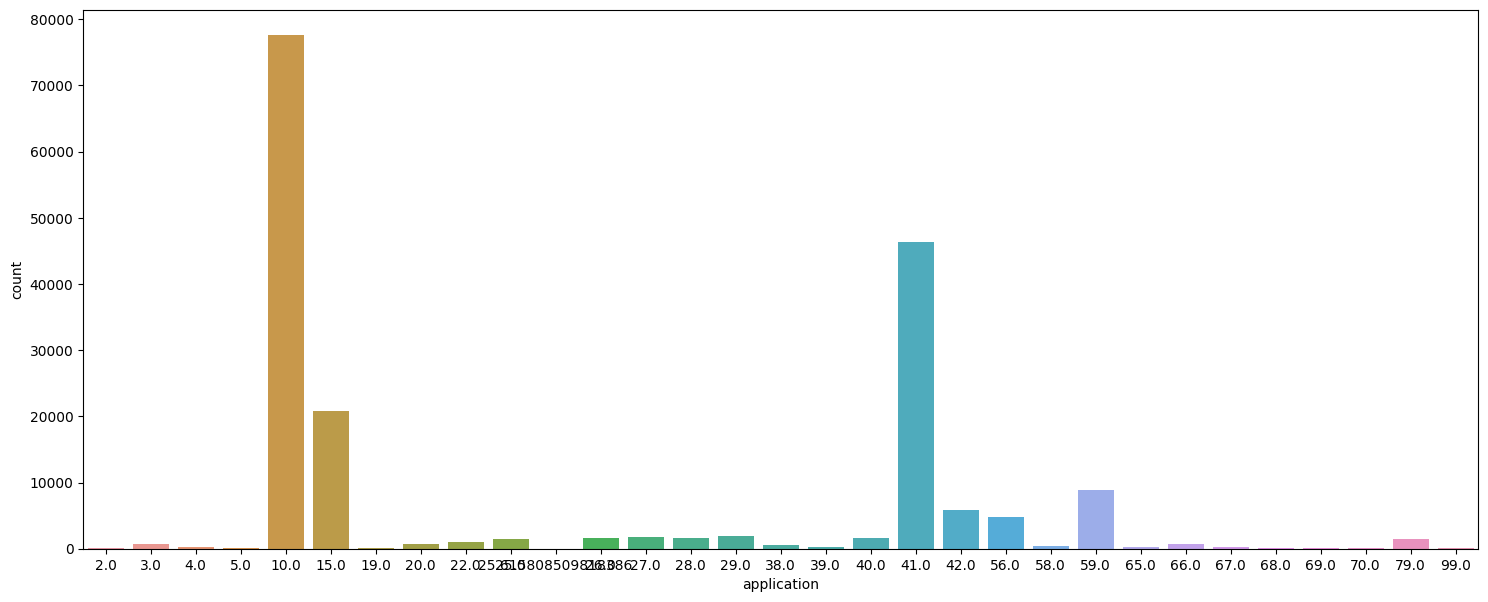

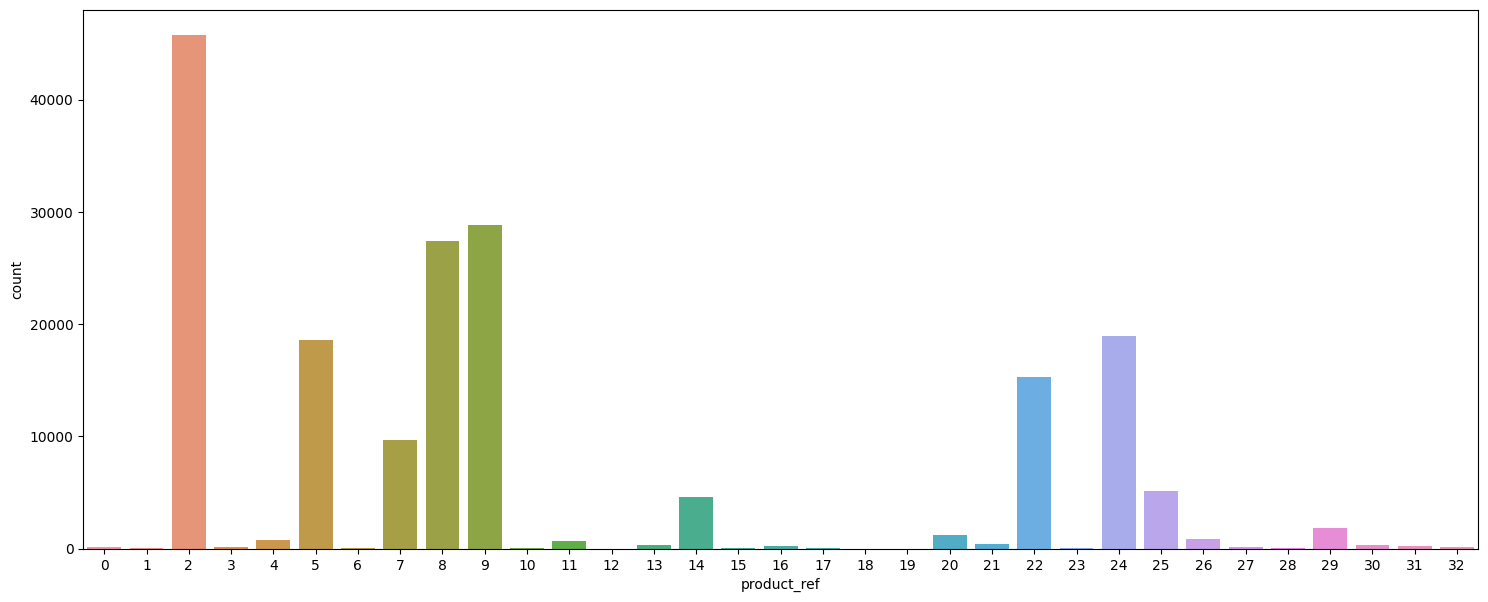

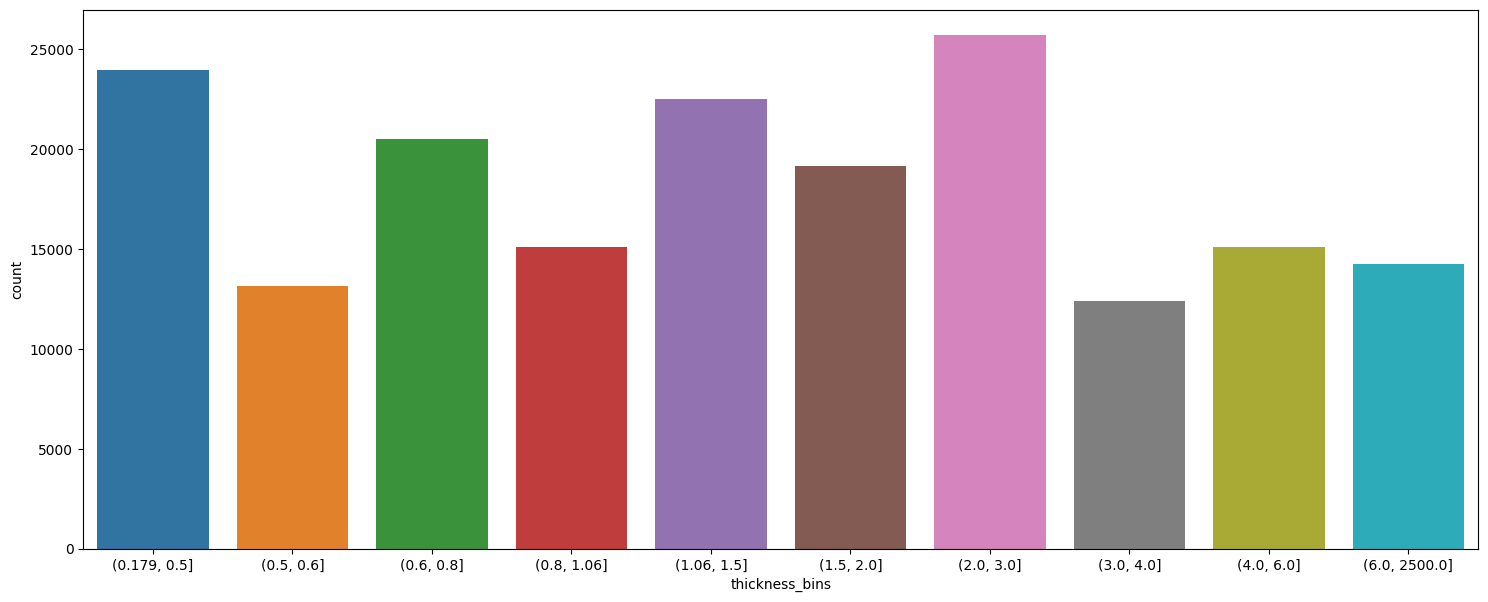

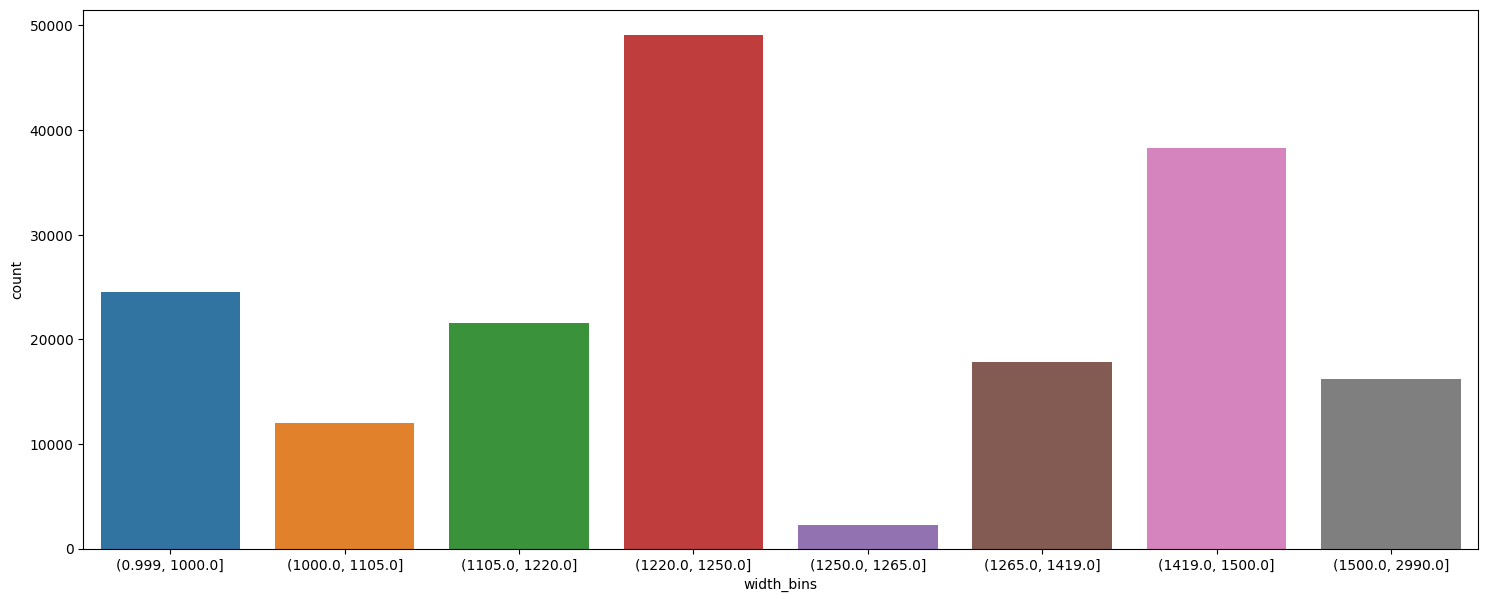

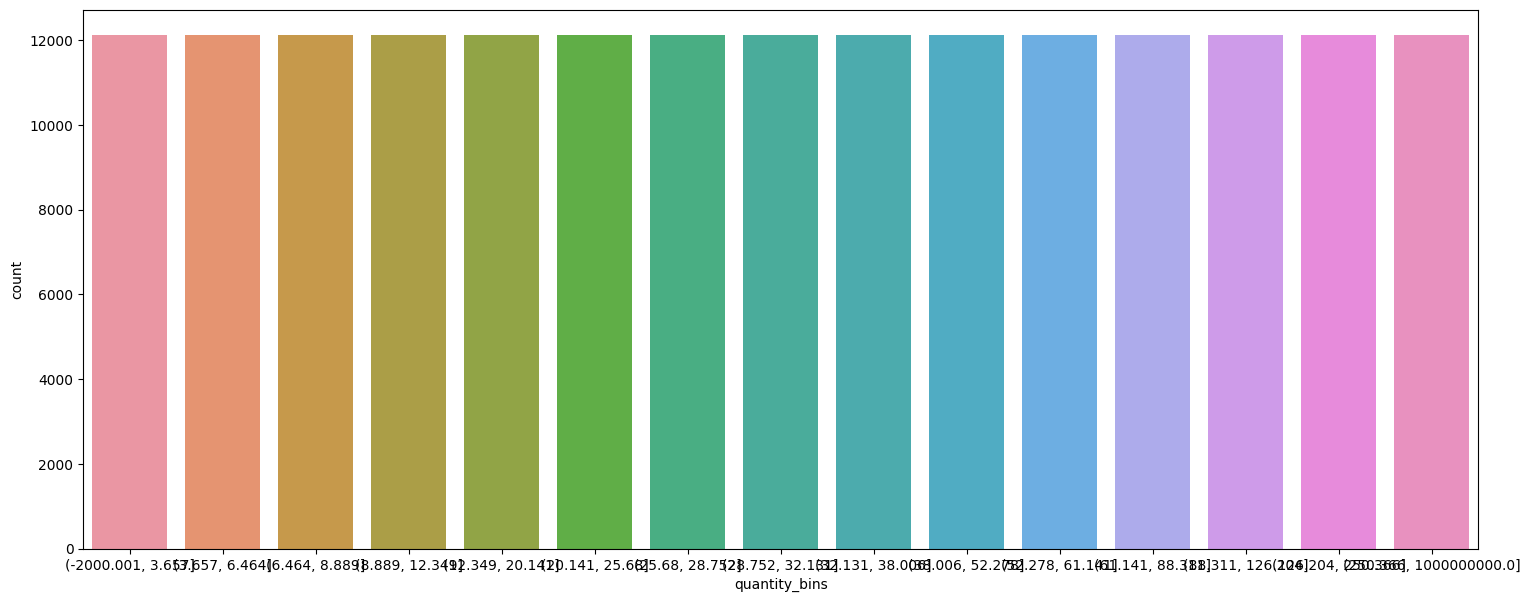

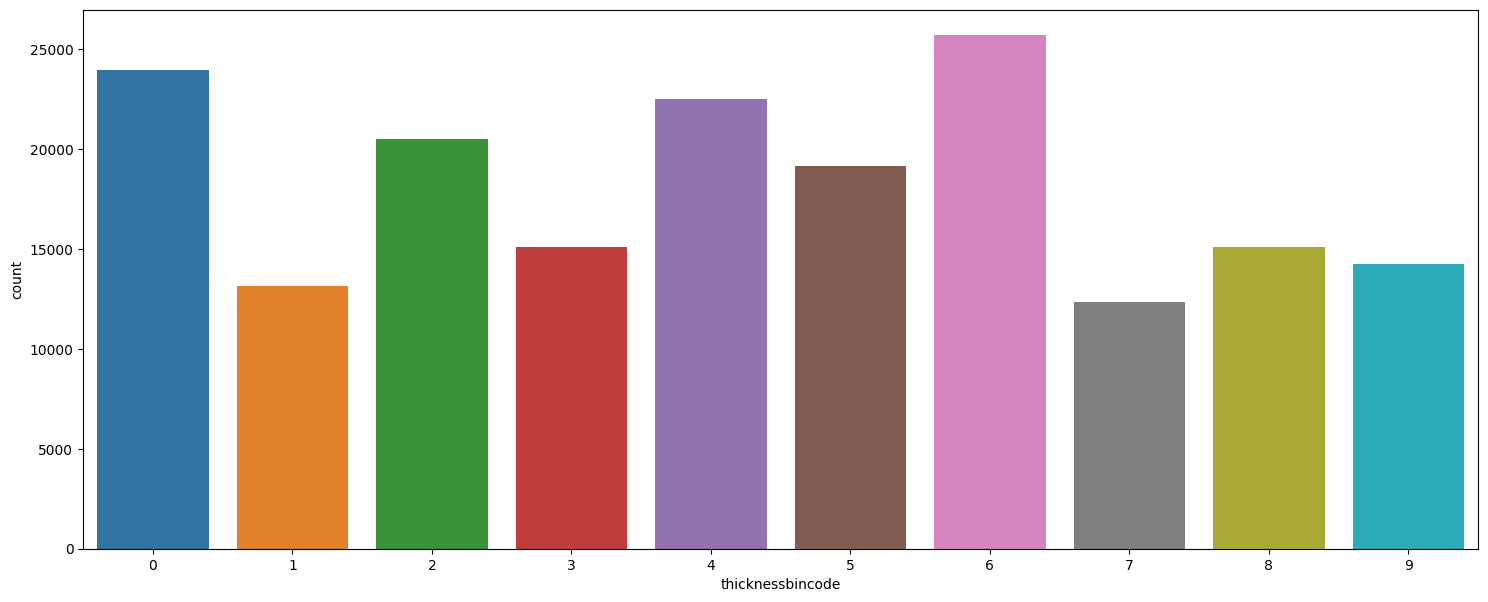

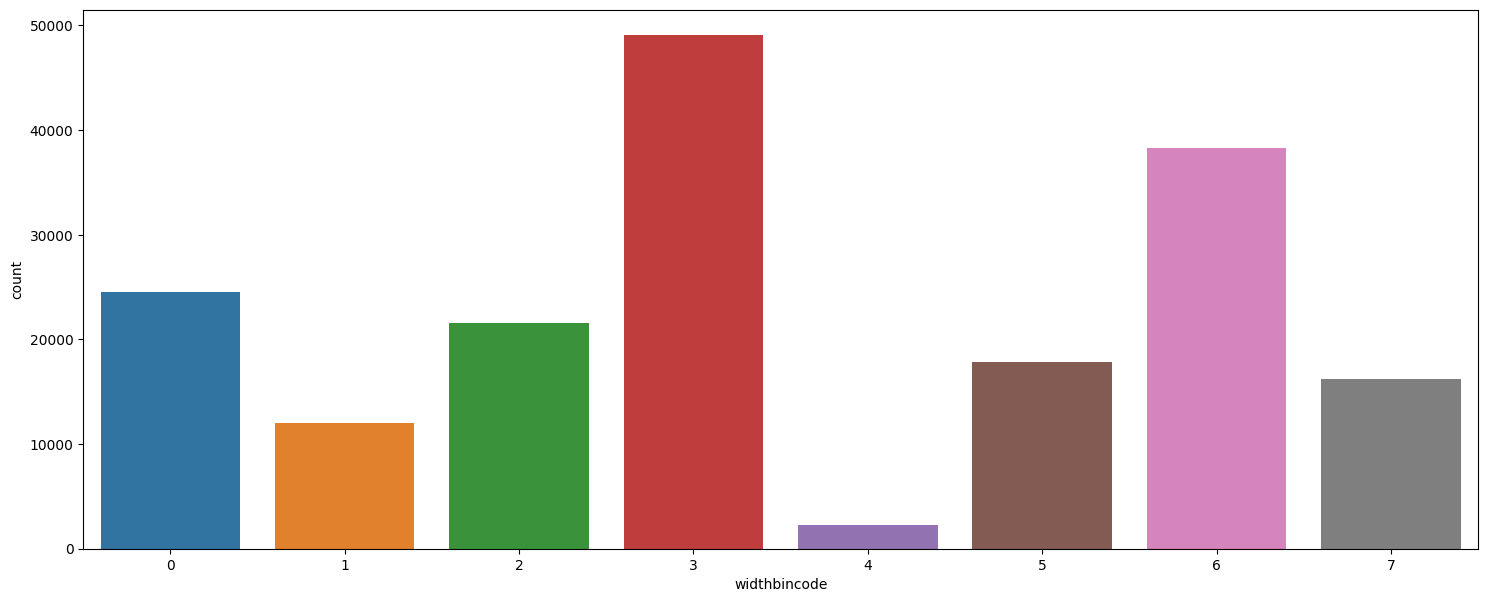

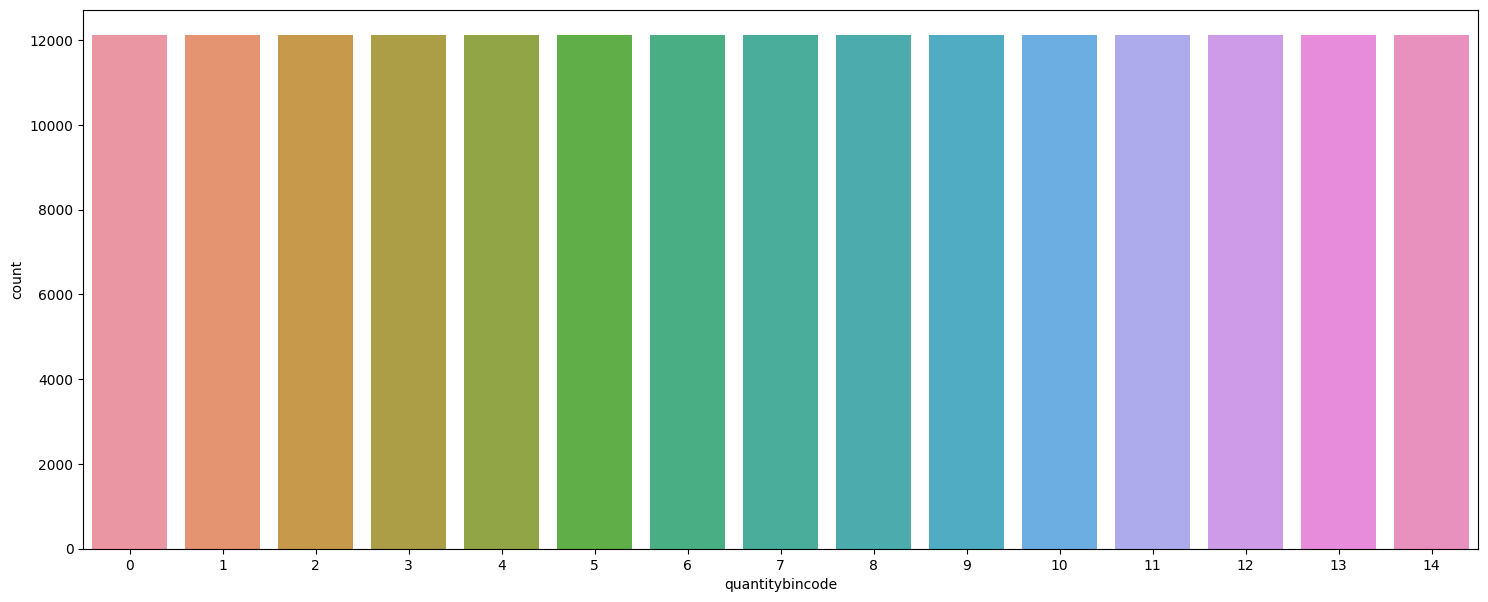

In [131]:
for i in df.columns:
    if(df[i].nunique()<35):
        plt.figure(figsize=(18, 7))
        sns.countplot(x=df[i])
        plt.show()

In [11]:
skewness = df.skew()
skewed_vars = skewness[abs(skewness) > 0.5].index
print(skewed_vars)

Index(['item_date', 'customer', 'country', 'application', 'thickness',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')


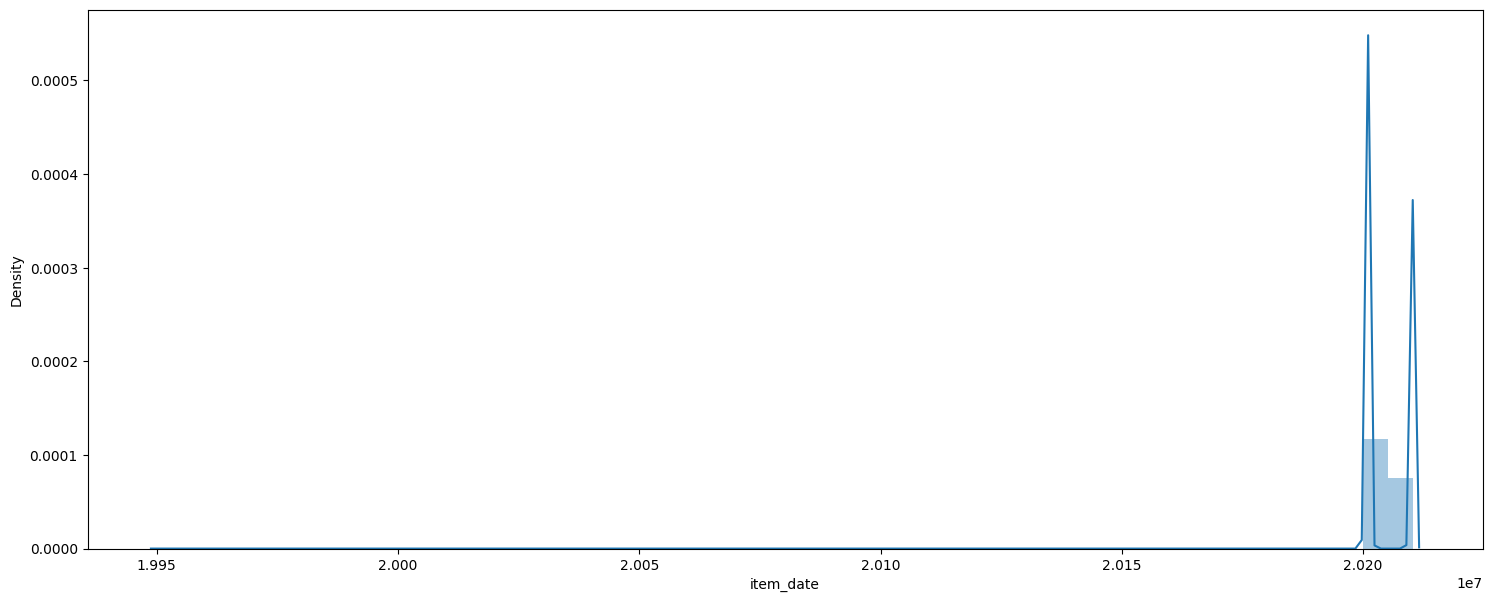

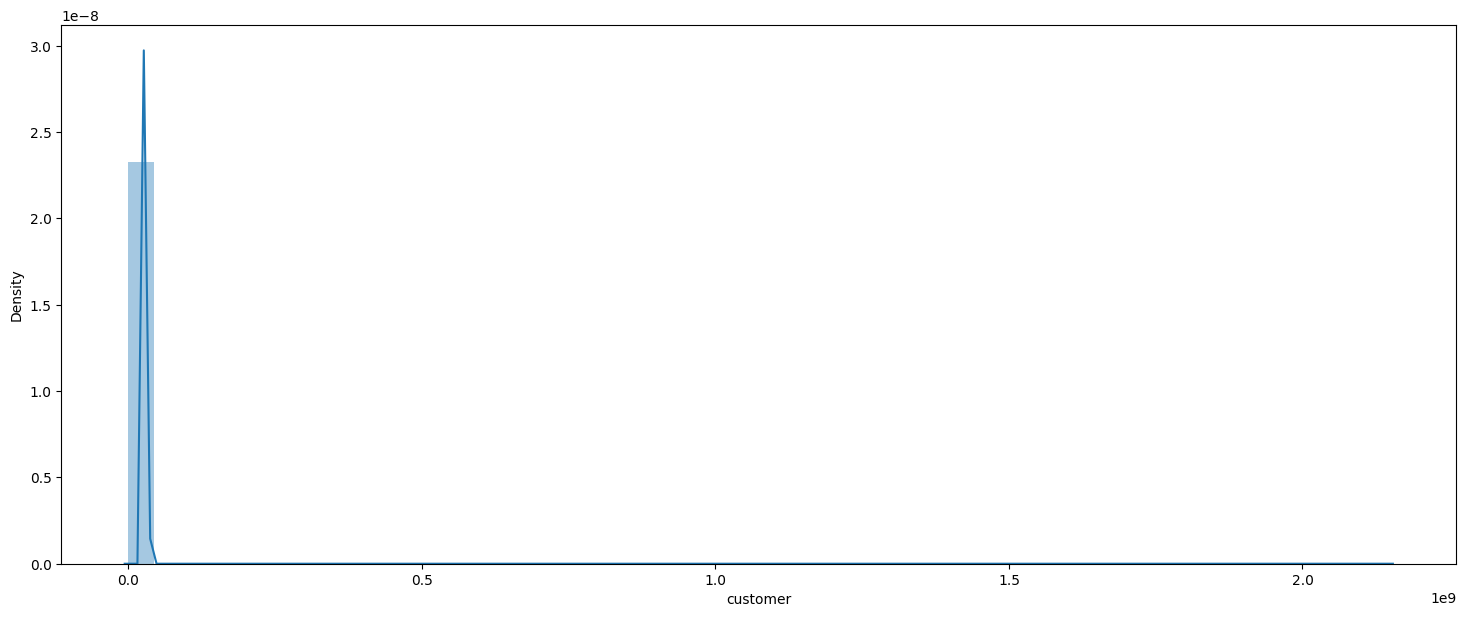

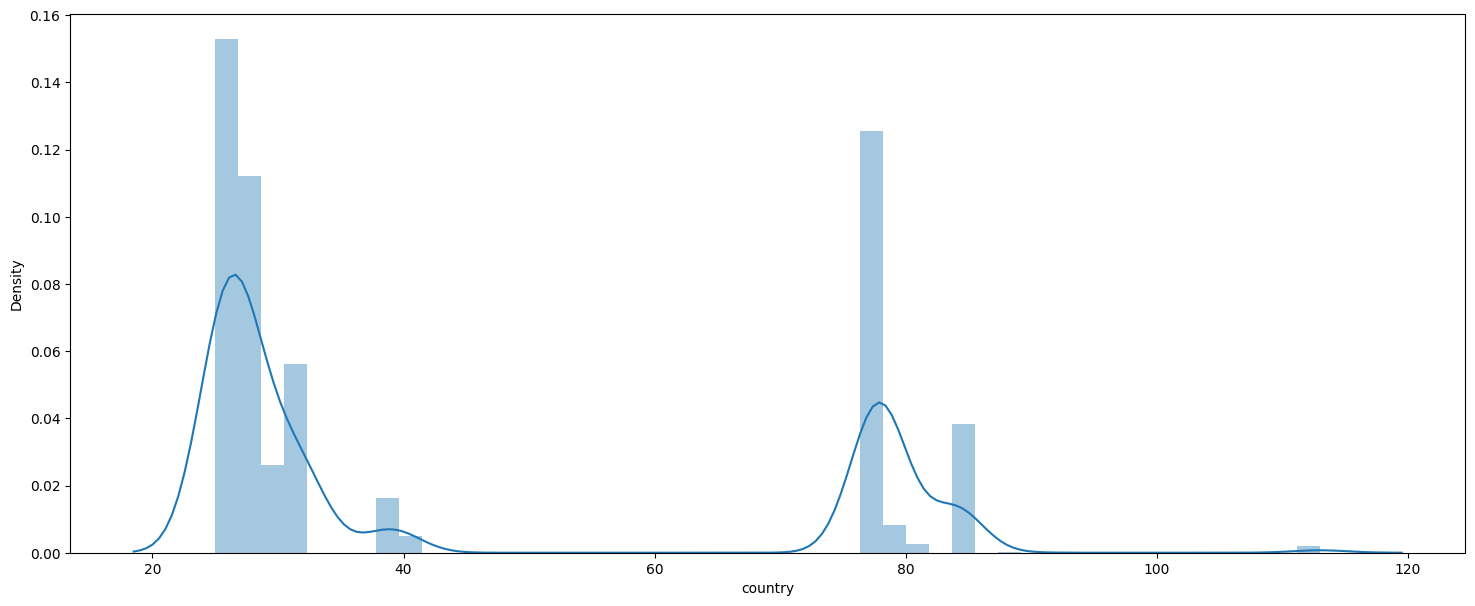

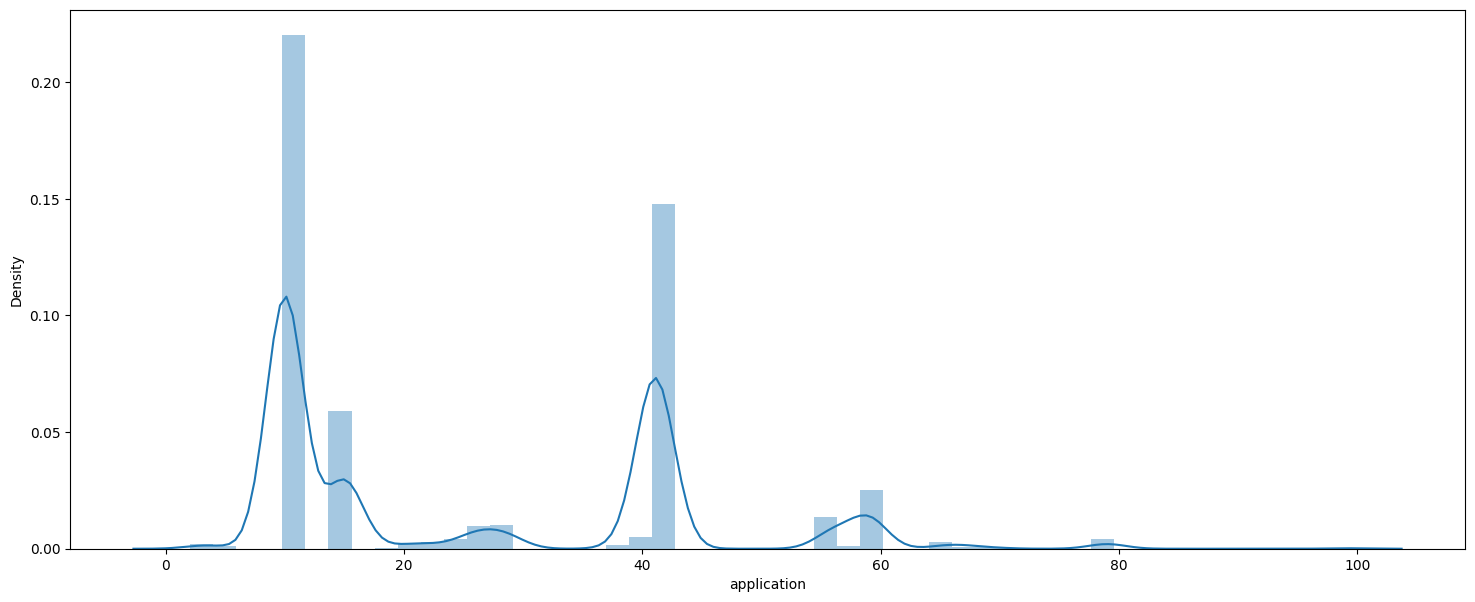

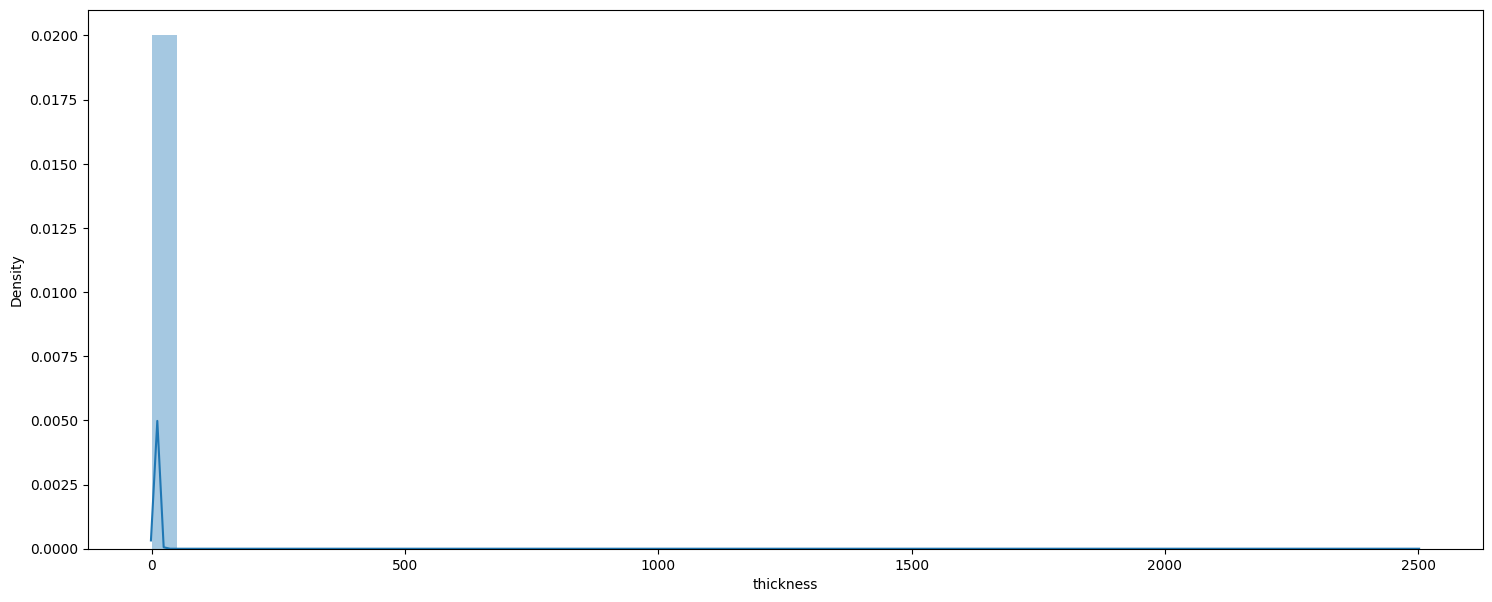

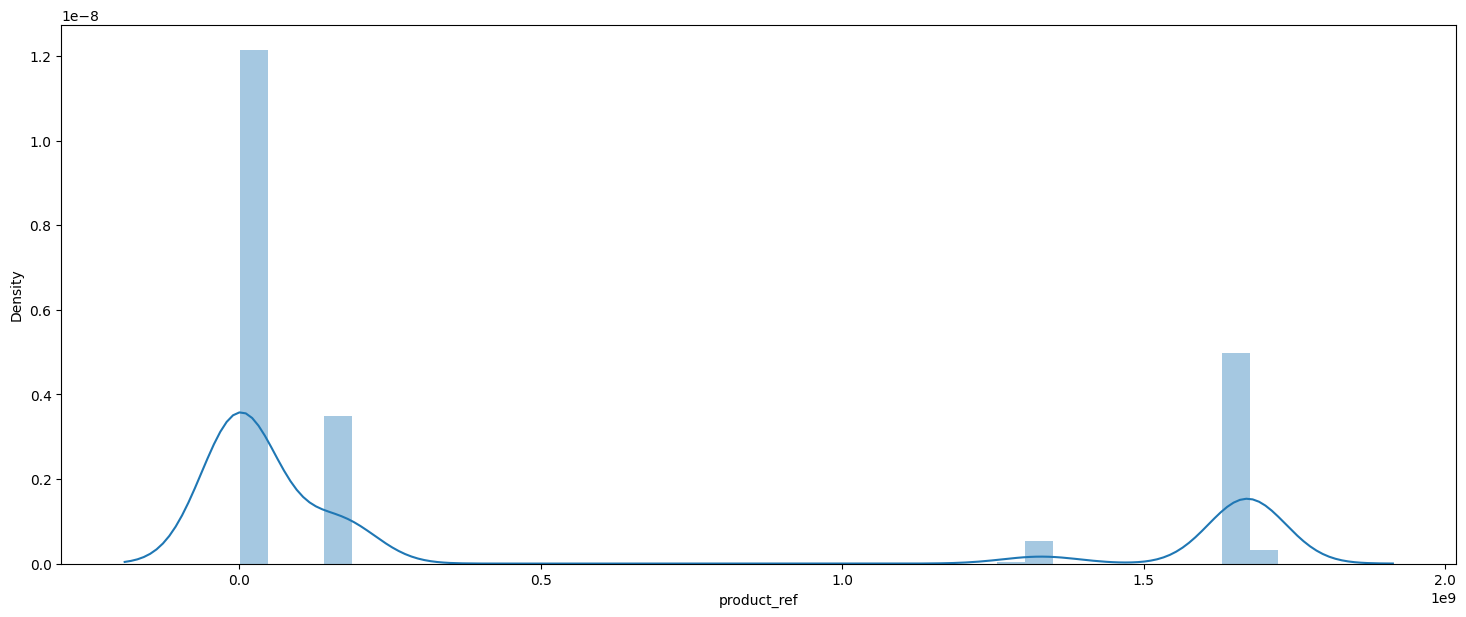

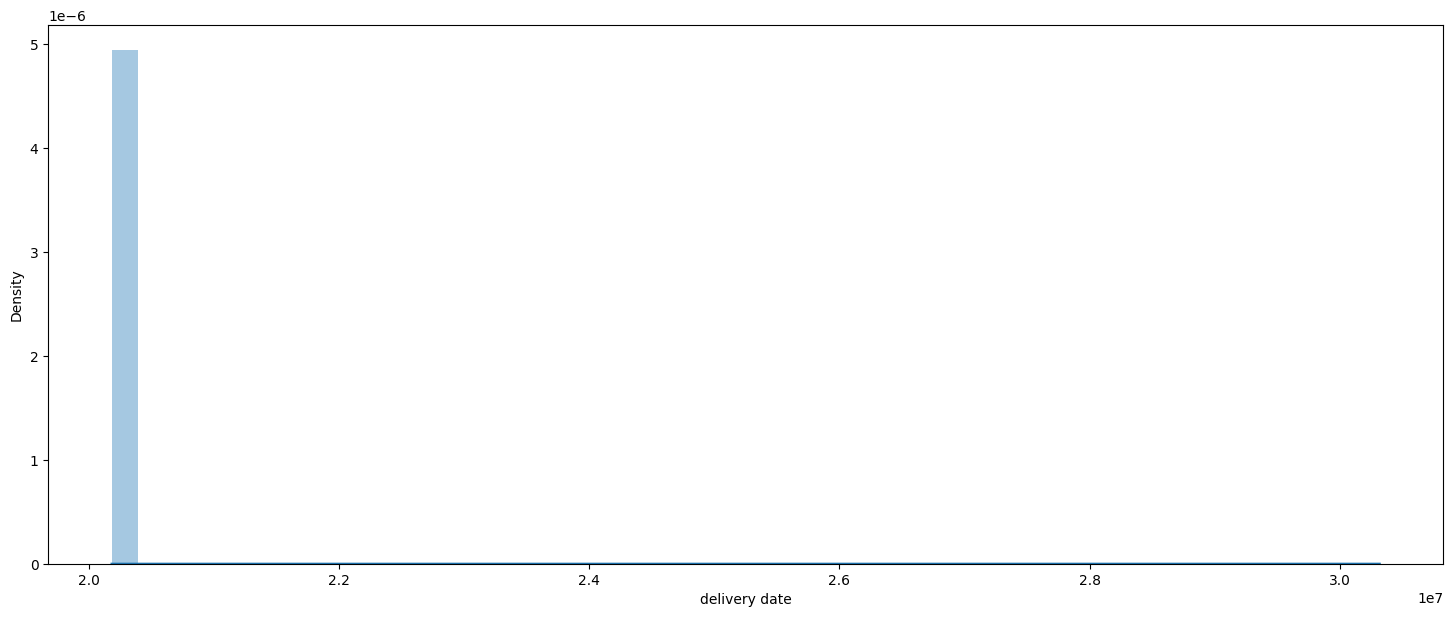

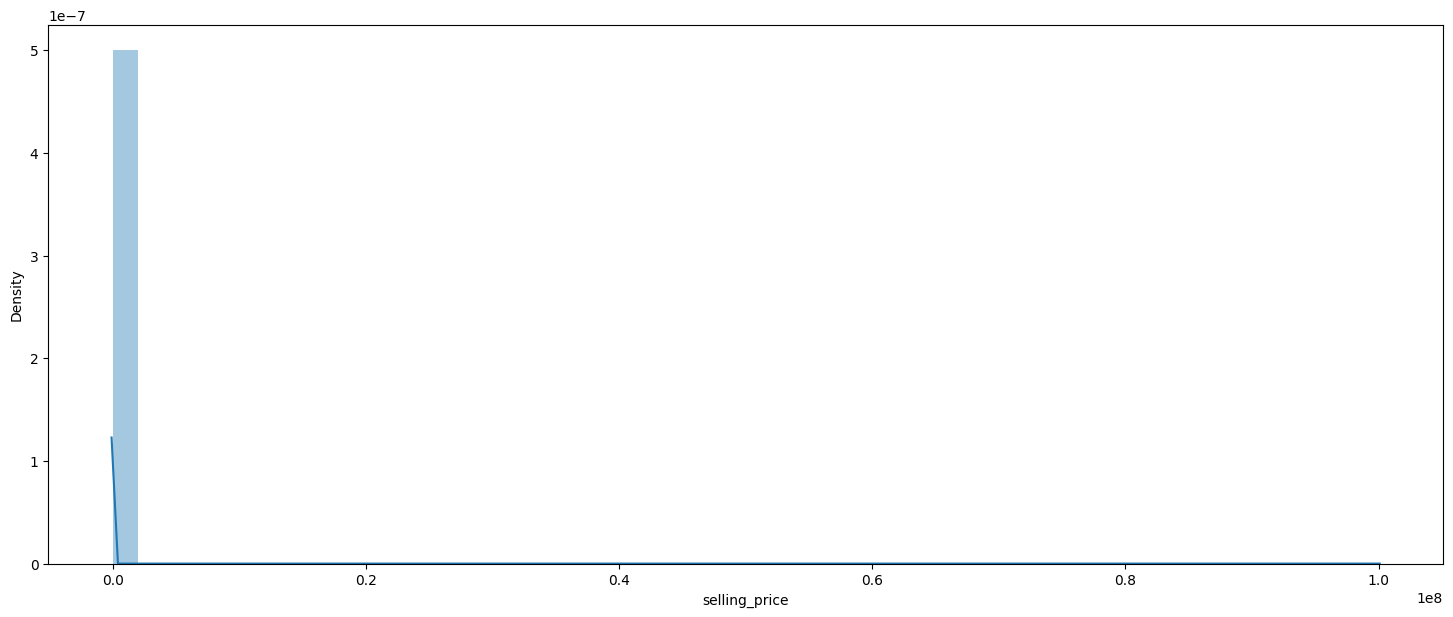

In [14]:
for col in ['item_date', 'customer', 'country', 'application', 'thickness', 'thicknessbin'
       'product_ref', 'delivery date', 'selling_price']:
    plt.figure(figsize=(18, 7))
    

    sns.distplot(df[col])
    plt.show()

FINDINGS:
    0) regplot and box plot on thickness vs. selling price says strong outlier in selling price
    1) Status = WON has most occurence and makes distribution right skew
    2) Material ref is left skew occurence skew
    3) Width of steel has its box whisker near 1500 value
    4) right skewed thickness is evenly distributed with qcut bins
    5) target variable is much right skew/ positive skew so transformation or oversampling of data requires
    6) when target variable not transformed or treated, only decision trees variants and ensemble models performs better as they are good in dealing positive skews
    7) from point plot , its clear that small thickness of steel and medium width size of steel have more selling price
    8) from facet plot when thickness is increases, its more likely the order status is lost

In [36]:
df['selling_price'].skew()

301.3880878785496

# DATA BATCH PROCESSING

In [132]:
cols01=['quantity tons',
 'customer',
 'country',
 'application',
 'material_ref',
 'product_ref',
 'total_amount',
       'aspect_ratio',
       'delivery_time'] # SCALING PARAMETERS
cols02=['quantity tons',
 'customer',
 'country',
 'application',
 'material_ref',
 'product_ref',
 'total_amount',
       'aspect_ratio',
       'delivery_time']
dfs= df.copy()
X_clean['y']= y_clean

In [133]:
X_clean

,quantity tons,customer,country,status,item type,application,material_ref,product_ref,delivery_time,aspect_ratio,total_amount,thicknessbincode,widthbincode,quantitybincode,y
0,5.322213,30156308.0,28.0,7,5,10.0,5377,24,3.000000e-07,750.000000,46245.072379,5,6,10,6.749931
5,8.057691,30202938.0,25.0,7,5,41.0,-1,22,0.000000e+00,843.333333,221952.234615,4,4,13,6.890609
7,6.670839,30342192.0,32.0,7,5,41.0,-1,2,-3.000000e-07,1794.117647,105563.412098,2,2,12,6.836259
8,5.751249,30341428.0,38.0,7,3,10.0,-1,20,3.000000e-07,2125.000000,94144.935370,1,5,11,7.217443
9,10.386336,30202938.0,25.0,7,5,41.0,-1,22,0.000000e+00,776.666667,619906.259120,4,2,14,6.890609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,6.478105,30200854.0,25.0,7,5,41.0,-1,9,-1.000000e-09,1270.833333,60567.111183,3,2,12,6.381816
181669,7.886324,30200854.0,25.0,7,5,41.0,-1,9,-1.000000e-09,1578.947368,122562.930012,3,6,13,6.378426
181670,1.597131,30200854.0,25.0,7,5,41.0,-1,9,-1.000000e-09,1760.563380,2621.832419,2,3,1,6.428105
181671,4.252829,30202938.0,30.0,7,5,15.0,-1,8,2.840000e-07,833.333333,22286.928313,4,3,6,6.398595


The StandardScaler scales the feature values to have zero mean and unit variance. It subtracts the mean of the feature values from each observation and then divides it by the standard deviation of the feature values. This ensures that the mean of the feature values becomes zero and the standard deviation becomes 1. The resulting feature values will be centered around zero and will have a variance of 1. 
DOESNOT MEAN 0-1 OR -1TO1 (MINMAX USED FOR 0-1)

In [134]:
#scaling continuous feature values = removing mean and standard deviation

scaler = StandardScaler()
for i in cols02:
    X_clean[i] = scaler.fit_transform(np.array(X_clean[i]).reshape(-1,1))
    

In [135]:
dfs[cols02]

,quantity tons,customer,country,application,material_ref,product_ref,total_amount,aspect_ratio,delivery_time
0,54.151139,30156308.0,28.0,10.0,5377,24,4.624507e+04,750.000000,3.000000e-07
1,768.024839,30202938.0,25.0,41.0,-1,22,8.041220e+05,1512.500000,0.000000e+00
2,386.127949,30153963.0,30.0,28.0,9681,5,2.487938e+05,2505.263158,-3.000000e-07
3,202.411065,30349574.0,32.0,59.0,5651,22,1.554517e+05,572.608696,-3.000000e-07
4,785.526262,30211560.0,28.0,10.0,1908,8,4.532487e+05,500.000000,-1.000000e-07
...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,41.0,-1,9,6.056711e+04,1270.833333,-1.000000e-09
181669,208.086469,30200854.0,25.0,41.0,-1,9,1.225629e+05,1578.947368,-1.000000e-09
181670,4.235594,30200854.0,25.0,41.0,-1,9,2.621832e+03,1760.563380,-1.000000e-09
181671,-2000.000000,30200854.0,25.0,41.0,-1,9,-1.202000e+06,1470.588235,-1.000000e-09


Log transformation involves taking the natural logarithm of the values in a dataset. This has the effect of compressing the values at the high end of the distribution and stretching the values at the low end. As a result, the distribution becomes more symmetric and the skewness is reduced.

but it may not work for variables with negative values.

In [136]:
# Split dataset into X (features) and y (target variable)
X = X_clean[cols4]
y = X_clean['y']
print(f"before transformation skewness of y = {df['selling_price'].skew()}" )
      
#applying log transformation to target variable to reduce skewness
## since applied log transform in outlier detection 

# Split X and y into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=53)

print(f"after transformation skewness of y = {y.skew()}")

before transformation skewness of y = 301.3880878785496
after transformation skewness of y = -0.055071646229343255


# MODEL TRAINING


In [137]:

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) 
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)  

In [138]:
#REGRESSION MODELS
seed = 53

linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features=None)
svm = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, 
    epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
et = ExtraTreesRegressor(
    n_estimators=100, 
    criterion='mse', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    random_state=seed, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=False, 
    oob_score=False, 
    n_jobs=None, 
    verbose=0, 
    warm_start=False, 
    ccp_alpha=0.0, 
    max_samples=None)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1, random_state = seed, n_jobs = -1)


In [139]:
# using cross validation 

def cross_validate(model):
    neg_score = cross_val_score(model, X_train, y_train, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')
    score = np.round(np.sqrt(-1*neg_score), 5)
    return score.mean()

models = [linear, lasso, ridge, elnt, dt, et, xgb]
models_n = ['linear', 'lasso', 'ridge', 'elnt', 'dt', 'et', 'xgb']
training_score = []
rmse_score = []
test_score = []
c=0
for model in models:
    scr=cross_validate(model)
    c+=1
    y_true = y_test# true target values for the test set
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)# predicted target values for the test set
    
    # Calculate R2 score tscr on tests
    tr2 = model.score(X_train, y_train)
    tscr = model.score(X_test, y_test) # or  r2 = r2_score(y_true, y_pred)


    
    training_score.append(tr2)
    rmse_score.append(scr)
    test_score.append(tscr)
    
    importances= []
    print(c, model, "RMSE_score:", scr,"\t", "Train_r2_score:", tr2,"\t", "Test_R2_score:", tscr,  "\n")

    if model in [ dt, et, xgb]:
        importances = model.feature_importances_
        model.feature_names = X.columns

        for i,v in zip(model.feature_names, importances):
            print('Feature: %s, Score: %.5f' % (i,v))
        print("\n")

        
# trainscore in df
train_score = pd.DataFrame({'Training_R2': training_score, 'rmse_score': rmse_score, 'test_score': test_score})
train_score.index = ['LR', 'LSO', 'RIDGE', 'ELNT', 'DT', 'ET', 'XGB']
train_score['rmse_score'] = (train_score['rmse_score']*100).round(4)
scatter_plot(train_score.index, train_score['rmse_score'], 'Training Score (RMSE)', 'Models','% Training Score', 30, 'Rainbow')



1 LinearRegression(n_jobs=-1) RMSE_score: 0.40336 	 Train_r2_score: 0.28637255545872997 	 Test_R2_score: 0.2856027806989594 

2 Lasso(random_state=53) RMSE_score: 0.23330200000000004 	 Train_r2_score: 0.0 	 Test_R2_score: -8.280598611243306e-07 

3 Ridge(random_state=53) RMSE_score: 0.389894 	 Train_r2_score: 0.2863725550628635 	 Test_R2_score: 0.28560315049897 

4 ElasticNet(random_state=53) RMSE_score: 0.23330200000000004 	 Train_r2_score: 0.0 	 Test_R2_score: -8.280598611243306e-07 

5 DecisionTreeRegressor(random_state=53) RMSE_score: 0.075184 	 Train_r2_score: 0.9999975474733229 	 Test_R2_score: 0.9043421202903641 

Feature: quantity tons, Score: 0.04805
Feature: customer, Score: 0.04183
Feature: country, Score: 0.06951
Feature: status, Score: 0.01609
Feature: item type, Score: 0.01221
Feature: application, Score: 0.01995
Feature: material_ref, Score: 0.02495
Feature: product_ref, Score: 0.34003
Feature: delivery_time, Score: 0.32173
Feature: aspect_ratio, Score: 0.01696
Feature: 

In [140]:
train_score['test_score']= train_score['test_score'].apply(lambda x : round(x,3))
train_score.sort_values(by='test_score')

,Training_R2,rmse_score,test_score
LSO,0.000000,23.3302,-0.000
ELNT,0.000000,23.3302,-0.000
LR,0.286373,40.3360,0.286
RIDGE,0.286373,38.9894,0.286
DT,0.999998,7.5184,0.904
XGB,0.940490,5.9962,0.935
ET,0.999998,5.0076,0.963


In [141]:
model = xgb
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=53, ...)

[learning_curve] Training set sizes: [ 11372  22744  34116  45488  56860  68232  79604  90976 102348 113720]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   38.3s finished


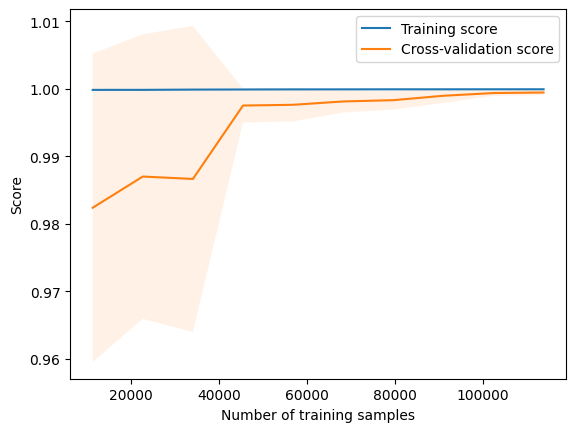

In [142]:
#LEARNING CURVE FOR XGB REGRESSOR

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(model, X_clean, y_clean, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

# mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [143]:
train_sizes

array([ 11372,  22744,  34116,  45488,  56860,  68232,  79604,  90976,
       102348, 113720])

In [183]:
def grid_search_cv(model, params,cv=10):
    global best_params, best_score
    
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv=cv , verbose = 1,
                            scoring = 'r2', n_jobs = -1)
    grid_search.fit(X_clean[colslast], y_clean)
    best_params = grid_search.best_params_ 
    best_score = grid_search.best_score_#np.sqrt(-1*(np.round(grid_search.best_score_, 5)))
    return best_params, best_score

In [184]:
X_clean

,quantity tons,customer,country,status,item type,application,material_ref,product_ref,delivery_time,aspect_ratio,total_amount,thicknessbincode,widthbincode,quantitybincode,y
0,0.634873,-0.011560,-0.664771,7,5,-0.851637,0.951983,1.787332,-0.082192,-0.460938,0.165165,5,6,10,6.749931
5,2.103416,-0.006767,-0.790864,7,5,1.083871,-0.678937,1.536394,-0.093276,-0.346198,3.551360,4,4,13,6.890609
7,1.358884,0.007550,-0.496646,7,5,1.083871,-0.678937,-0.972985,-0.104360,0.822663,1.308337,2,2,12,6.836259
8,0.865201,0.007471,-0.244459,7,3,-0.851637,-0.678937,1.285456,-0.082192,1.229438,1.088282,1,5,11,7.217443
9,3.353551,-0.006767,-0.790864,7,5,1.083871,-0.678937,1.536394,-0.093276,-0.428155,11.220655,4,2,14,6.890609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,1.255414,-0.006981,-0.790864,7,5,1.083871,-0.678937,-0.094703,-0.093313,0.179356,0.441177,3,2,12,6.381816
181669,2.011417,-0.006981,-0.790864,7,5,1.083871,-0.678937,-0.094703,-0.093313,0.558140,1.635948,3,6,13,6.378426
181670,-1.364940,-0.006981,-0.790864,7,5,1.083871,-0.678937,-0.094703,-0.093313,0.781413,-0.675534,2,3,1,6.428105
181671,0.060774,-0.006767,-0.580708,7,5,-0.539458,-0.678937,-0.220172,-0.082783,-0.358491,-0.296552,4,3,6,6.398595


In [185]:
colslast=['quantity tons', 'country', 'status', 'item type', 'application',
       'material_ref', 'product_ref', 'delivery_time', 'aspect_ratio',
       'total_amount', 'thicknessbincode', 'widthbincode', 'quantitybincode']

In [186]:
# hyperparameters tuning of ridge

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100],
              'normalize': [True, False],
              'max_iter': [100, 500, 1000],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              'tol': [0.001, 0.01, 0.1],
              'fit_intercept': [True, False],
              'random_state': [0,53]}
model = ridge

best_params, best_score = grid_search_cv(ridge, ridge_params)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))
grid_search_cv(lasso, ridge_params)
ridge_best_params, ridge_best_score = best_params, best_score
print('Lasso best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Ridge best params:{'alpha': 1, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'random_state': 0, 'tol': 0.001} & best_score:-0.60243
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Lasso best params:{'alpha': 0.01, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'random_state': 0, 'tol': 0.1} & best_score:-0.53425


In [177]:
# hyperparameters tuning of XGB [ENSEMBLE LEARNING] [TRAINED 1HR]
model = xgb
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.5,  1.0],
    'colsample_bytree': [0.5,  1.0],
    'gamma': [0.0, 0.1, 0.5]
}
best_params, best_score = grid_search_cv(xgb, param_grid, cv=5)
print('XGB best params:{} & best_score(RMSE):{:0.5f}' .format(best_params, best_score))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [230]:
r2 = xgb.score(X_test,y_test)
r2

0.9344309931089145

In [167]:
X_train

,quantity tons,customer,country,status,item type,application,material_ref,product_ref,delivery_time,aspect_ratio,total_amount,thicknessbincode,widthbincode,quantitybincode
54145,-0.684019,-0.011142,1.436786,7,5,1.083871,2.803978,-0.972985,-0.083042,0.812332,-0.499626,2,3,3
34325,1.426282,0.000260,-0.664771,7,5,-0.539458,-0.678937,1.787332,-0.079274,-1.075621,1.135033,8,6,12
10743,0.723502,-0.007389,1.688973,7,3,-0.851637,-0.678937,-0.094703,-0.079126,0.178331,0.461241,3,5,10
14432,-1.936323,0.007889,-0.748833,7,5,1.083871,-0.678937,1.787332,-0.075357,-1.100208,-0.696896,8,5,0
72557,-1.682057,-0.006810,-0.496646,7,5,0.334642,2.293595,-0.094703,0.234810,-0.301121,-0.687979,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14327,-0.561332,-0.006431,-0.748833,7,5,1.083871,-0.678937,-0.972985,-0.079052,0.153744,-0.452449,3,3,4
178010,-0.956610,-0.011069,1.436786,7,5,-0.851637,-0.678937,-0.596578,-0.089803,0.153744,-0.641151,2,0,2
11299,-0.461669,-0.006767,-0.790864,7,5,1.083871,-0.678937,1.787332,-0.090210,-0.928097,-0.482862,6,2,4
68343,0.707217,-0.006774,-0.496646,7,5,-0.851637,-0.678937,0.532642,-0.082414,0.373274,0.294313,2,0,10


In [231]:
r2 = et.score(X_test,y_test)
r2

0.9610719689589928

In [229]:
# hyperparameters tuning of Extra tree TRAINED [2.5HR]
model = et
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": [42]
}
best_params, best_score = grid_search_cv(et, param_grid)
print('Extra Tree best params:{} & best_score:{:0.5f}' .format(best_params, best_score))

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Extra Tree best params:{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42} & best_score:0.04858


In [ ]:
#RMSE score default of 0.05 to best parameter score 0.04

In [168]:
from sklearn.feature_selection import SelectPercentile, f_classif

# selector instance with f_classif scoring function 
selector = SelectPercentile(f_classif, percentile=90)

selector.fit(X_clean, y_clean)

selected_features = selector.get_support()

X_selected = np.array(X_clean)[:, selected_features]
X_clean.columns[selected_features] #CUSTOMER, DELIVER_TIME REMOVED/ LEAST INFLUENCING VARS 

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'material_ref', 'product_ref', 'delivery_time', 'aspect_ratio',
       'total_amount', 'thicknessbincode', 'widthbincode', 'quantitybincode'],
      dtype='object')

In [169]:
X_clean.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'material_ref', 'product_ref', 'delivery_time',
       'aspect_ratio', 'total_amount', 'thicknessbincode', 'widthbincode',
       'quantitybincode', 'y'],
      dtype='object')

# Conclusion:
1) given dataset contains potential outliers in selling price(TARGET VARIABLE), so applying log transform instead box-cox transformation cause it can handle large ranges of data, and the transformation is easily reversible.

2) it also contains right skewness in trainable parameters quantity tons, using Winsorization transformation as it is best suited for reasonable imputation of non extreme values and best for treating outlier.

3) skewness in thickness, width are treated by making qbins 

4) model achieves best R2 score of 0.95 with EXTRA TREE REGRESSOR, 300 with RIDGE regress during 1st training where no outliers were removed. after outlier removal, model achives same result of 0.95 nearer with EXTRA TREE but with RIDGE regress 0.93 R2score.


5) used models:
* EDA = SNS, MATPLOTLIB
* Outlier Detection: sklearn's ISOLATION FOREST TREE reduced 181673 to 138719 datapoints , also can use sklearn.neighbors LocalOutlierFactor with parameter contamination to reduce the outlier sizes
* Simple imputer used to fill nulls while outlier treating
* 4'C of preprocessing with pandas functions
* Model training with Cross validation along with K-folds shuffle splits
* Model learning curve
* Hyper parameter tuning using grid search cv
* Feature importance using trees and feature selection using statistical significance test(ANOVA F-value TEST) with 90th percentile feature CUSTOMER, DELIVERYTIME REMOVED.
* 96% R2score on test bt EXTRA TREE is good model(96% variance of all features explained by this ET model)

In [223]:
pip freeze > requirementsforCOPPER.txt

Note: you may need to restart the kernel to use updated packages.


# extra task and see their performance
1) try diff delivery time format like in months in days in hours

2) try converting categorical variable using any encoder 

3) try creating new meaningful EDA for data analysis

4) try imputing data or removing data will aid ml model performance

5) try classification model of predicting the lead won/lost/inprogress only

6) try capturing the cat codes inverse also

7) try interpretting why regression model fails but trees works best.

ADD VIOLIN PLOT, CHNAGE EDA TO TOP, WHAT SHOULD WE DO FOR LINEAR MODEL BEST, LEARN LINEAR REG AND DECISION TREES, PARAMETR WORKINGS, OPTIMIZING CODE(TARGET ENCODE, CONT VAR TREAT RIGHT) INTO SIMPLE STRUCT, ENGAGING/NOVEL METHOD/TIP FOR ROUGHSTART AND DEEP RESEARCHING TRICKS?
you can also consider using a combination of methods, such as using Isolation Forest to identify outliers and then using LOF or DBSCAN to further refine the results

# NOTES
* In the context of Winsorization being used for imputing non-extreme values and treating outliers in the 'quantity tons' column, it is important to note that Winsorization typically replaces extreme values with values that are less extreme but still within the range of the original data. This can help to reduce the impact of outliers on statistical analysis, but it does not fundamentally change the nature of the relationship between variables.
*  using mode for imputing categorical variables has its advantages in preserving the original distribution and retaining the original categories. However, it may also have disadvantages in potentially ignoring other information, causing loss of variability

One-hot encoding creates a binary indicator variable for each category in the variable, essentially transforming the categorical variable into a set of binary variables. This can help capture nonlinear relationships between the categorical variable and the target variable. However, this can lead to the creation of many new variables and can lead to the curse of dimensionality.

Target encoding, on the other hand, replaces each category in the categorical variable with the mean of the target variable for that category. This can help to capture the relationship between the categorical variable and the target variable and can reduce the dimensionality of the data. However, care must be taken to avoid overfitting and to handle cases where a category has too few samples.

In [ ]:
import category_encoders as ce

# Define the categorical variables to be target encoded
cat_vars = ['country', 'application', 'thickness', 'product_ref']

# Create the target encoder object
target_encoder = ce.TargetEncoder(cols=cat_vars)

# Fit the target encoder on the training data
target_encoder.fit(X_train, y_train)

# Transform the categorical variables using the target encoder
X_train = target_encoder.transform(X_train)
X_test = target_encoder.transform(X_test)
